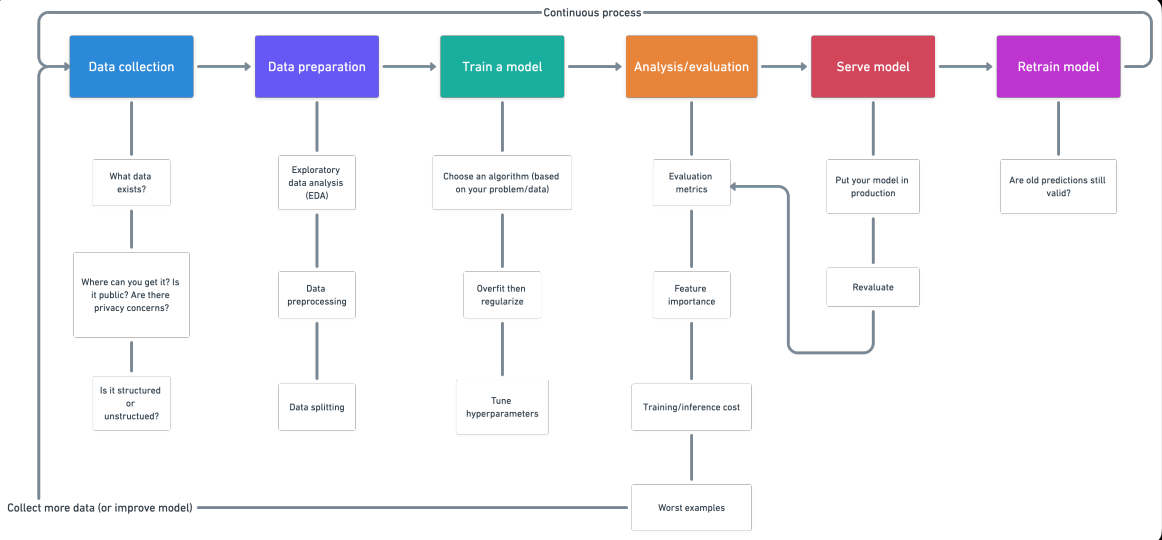

In [1]:
# assign to undustandable name to dataset
names = ['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors',
         'body_style','drive_wheels','engine_location','wheel_base','length','width',
         'height','curb_weight','engine_type','num_of_cylinders','engine_size',
         'fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm',
         'city_mpg','highway_mpg','price']


In [2]:
# import libararies and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
car_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",names = names)
car_df

symboling normalized_losses         make fuel_type aspiration  \
0            3                 ?  alfa-romero       gas        std   
1            3                 ?  alfa-romero       gas        std   
2            1                 ?  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num_of_doors   body_style drive_wheels engine_location  wheel_base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1            two  convertible          rwd           front        88.6  ...   
2            two    hatchback          rwd           front        94.5  ...   
3           four        sedan          fwd           front        99.8  ...   
4           four        sedan          4wd           front        99.4  ...   
..           ...          ...          ...             ...         ...  ...   
200         four        sedan          rwd           front       109.1  ...   
201         four        sedan          rwd           front       109.1  ...   
202         four        sedan          rwd           front       109.1  ...   
203         four        sedan          rwd           front       109.1  ...   
204         four        sedan          rwd           front       109.1  ...   

     engine_size  fuel_system  bore  stroke compression_ratio horsepower  \
0            130         mpfi  3.47    2.68               9.0        111   
1            130         mpfi  3.47    2.68               9.0        111   
2            152         mpfi  2.68    3.47               9.0        154   
3            109         mpfi  3.19    3.40              10.0        102   
4            136         mpfi  3.19    3.40               8.0        115   
..           ...          ...   ...     ...               ...        ...   
200          141         mpfi  3.78    3.15               9.5        114   
201          141         mpfi  3.78    3.15               8.7        160   
202          173         mpfi  3.58    2.87               8.8        134   
203          145          idi  3.01    3.40              23.0        106   
204          141         mpfi  3.78    3.15               9.5        114   

     peak_rpm city_mpg highway_mpg  price  
0        5000       21          27  13495  
1        5000       21          27  16500  
2        5000       19          26  16500  
3        5500       24          30  13950  
4        5500       18          22  17450  
..        ...      ...         ...    ...  
200      5400       23          28  16845  
201      5300       19          25  19045  
202      5500       18          23  21485  
203      4800       26          27  22470  
204      5400       19          25  22625  

[205 rows x 26 columns]

In [3]:
car_df.head().T

0            1            2      3      4
symboling                    3            3            1      2      2
normalized_losses            ?            ?            ?    164    164
make               alfa-romero  alfa-romero  alfa-romero   audi   audi
fuel_type                  gas          gas          gas    gas    gas
aspiration                 std          std          std    std    std
num_of_doors               two          two          two   four   four
body_style         convertible  convertible    hatchback  sedan  sedan
drive_wheels               rwd          rwd          rwd    fwd    4wd
engine_location          front        front        front  front  front
wheel_base                88.6         88.6         94.5   99.8   99.4
length                   168.8        168.8        171.2  176.6  176.6
width                     64.1         64.1         65.5   66.2   66.4
height                    48.8         48.8         52.4   54.3   54.3
curb_weight               2548         2548         2823   2337   2824
engine_type               dohc         dohc         ohcv    ohc    ohc
num_of_cylinders          four         four          six   four   five
engine_size                130          130          152    109    136
fuel_system               mpfi         mpfi         mpfi   mpfi   mpfi
bore                      3.47         3.47         2.68   3.19   3.19
stroke                    2.68         2.68         3.47   3.40   3.40
compression_ratio          9.0          9.0          9.0   10.0    8.0
horsepower                 111          111          154    102    115
peak_rpm                  5000         5000         5000   5500   5500
city_mpg                    21           21           19     24     18
highway_mpg                 27           27           26     30     22
price                    13495        16500        16500  13950  17450

EDA

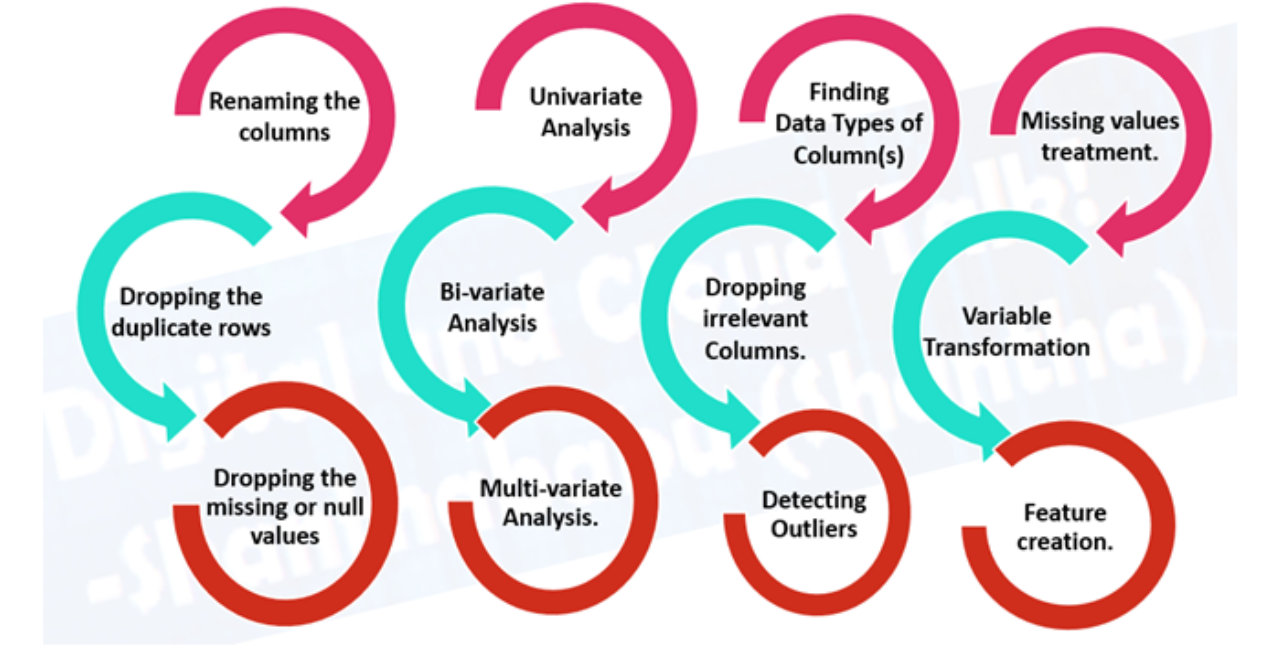

Univarient analysis

In [4]:
df = car_df.iloc[:int(len(car_df)*2/3)]
Train =  car_df.iloc[int(len(car_df)*2/3):]

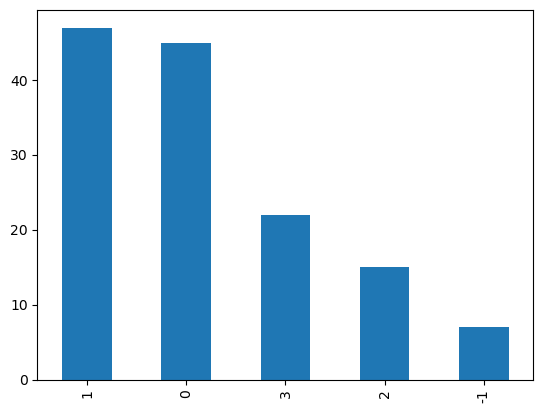

In [5]:
df["symboling"].value_counts().plot(kind = 'bar')
plt.show()

### univarient analysis of categorical varieble

In [6]:
df = df.replace("?",np.nan)

In [7]:
df[["normalized_losses",'bore','stroke','horsepower','peak_rpm','price']] = df[["normalized_losses",'bore','stroke','horsepower','peak_rpm','price']].astype("float64")


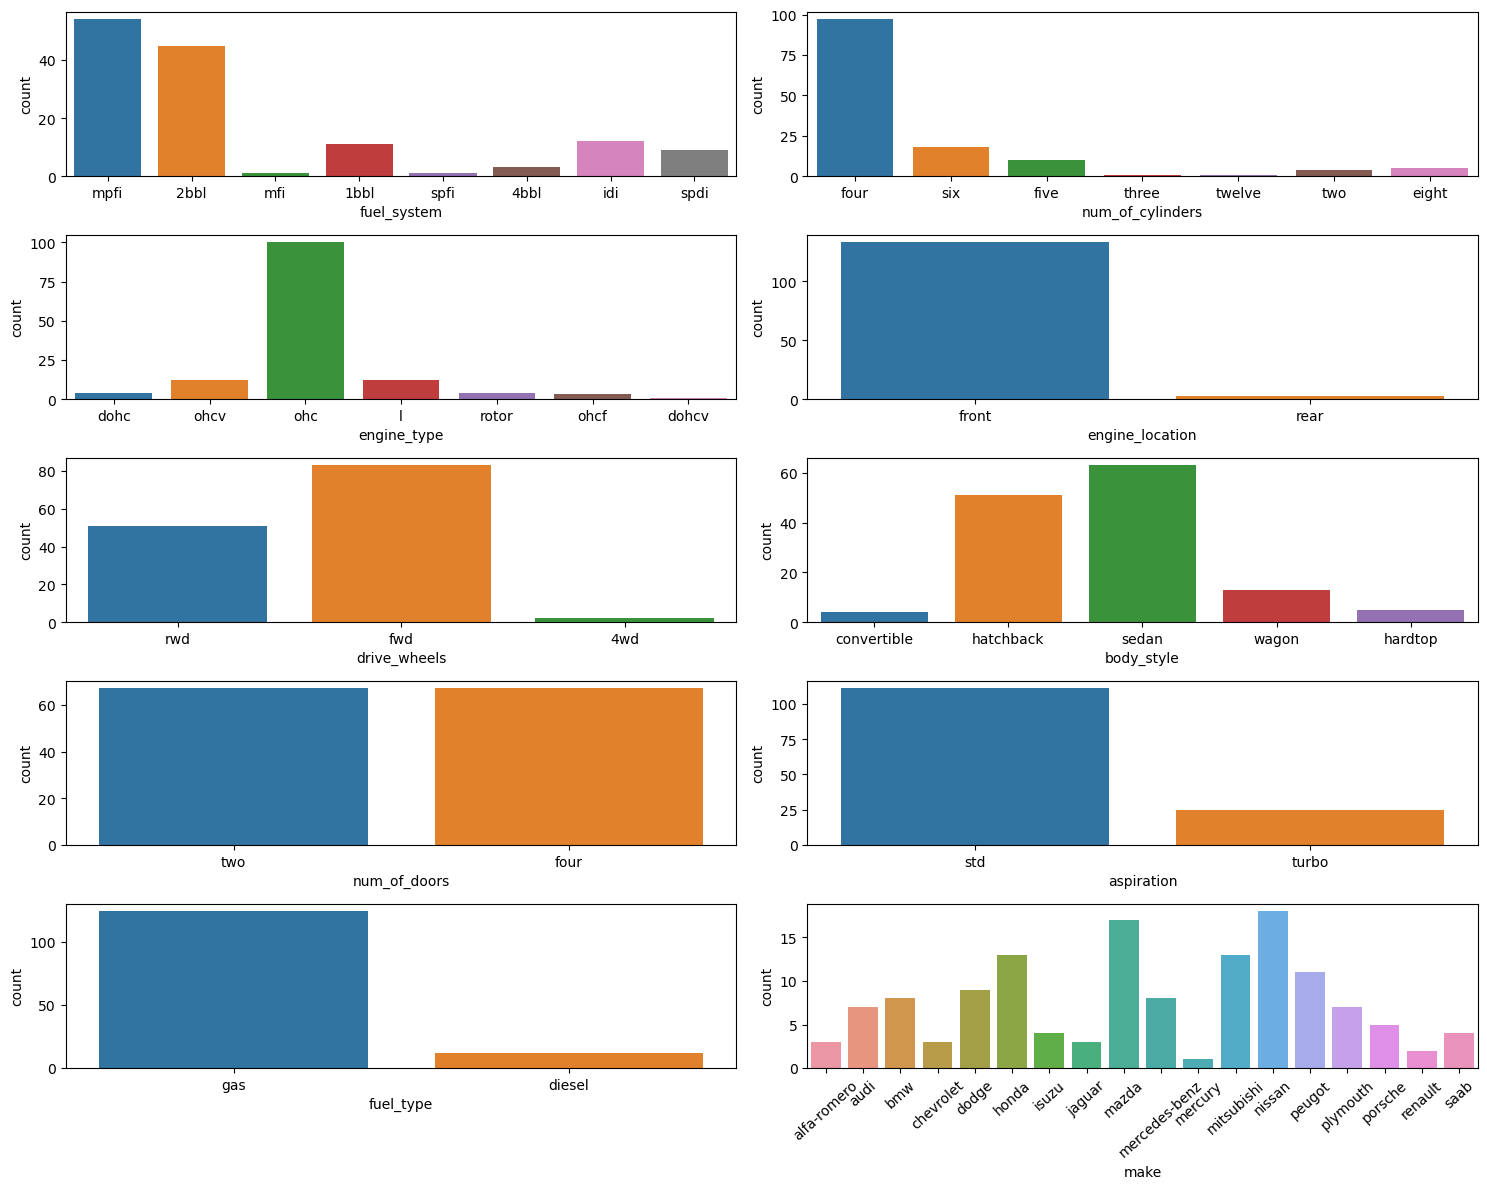

In [8]:
fig , ax = plt.subplots(5,2 , figsize = (15,12))
cols = df.select_dtypes("object").columns
cols = cols[::-1]
index = 0
for i in range(5):
    for j in range(2):
        plt.xticks(rotation=42)
        sns.countplot(x = df[cols[index]]  , ax = ax[i][j])
        index+=1
plt.tight_layout()

Univarient analysis Discrete varieble

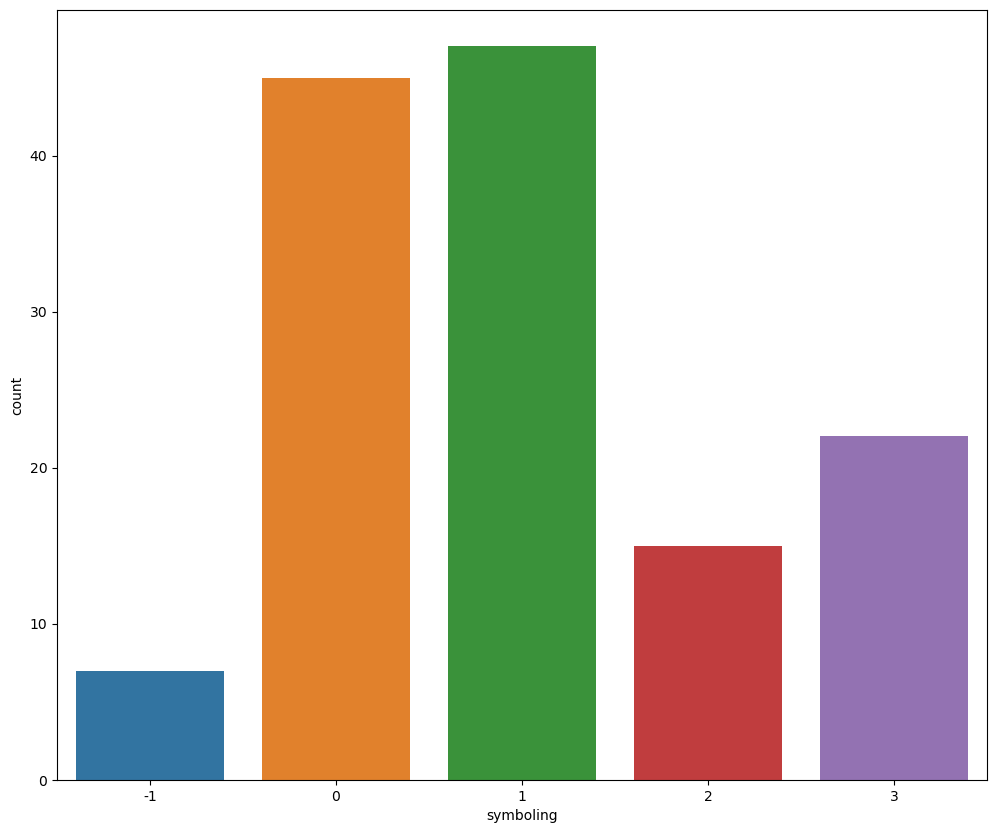

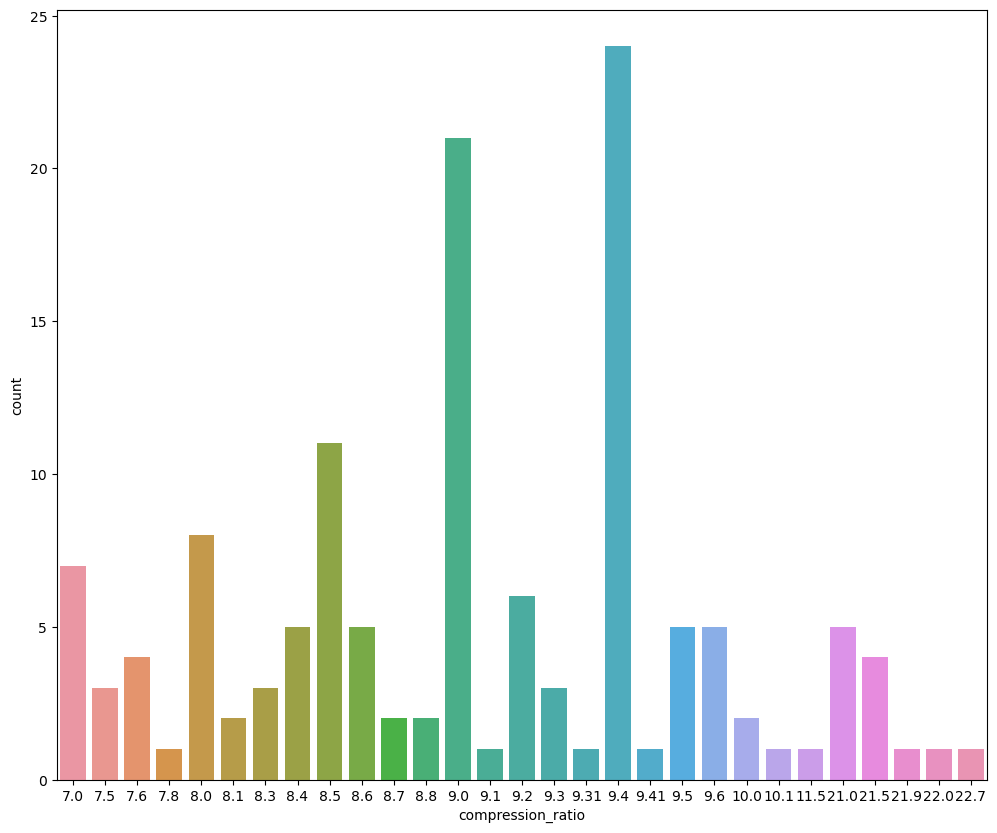

In [9]:
des_df = df[["symboling","compression_ratio"]]
for i in des_df.columns:
    plt.figure(figsize = (12,10))
    sns.countplot(x= des_df[i])

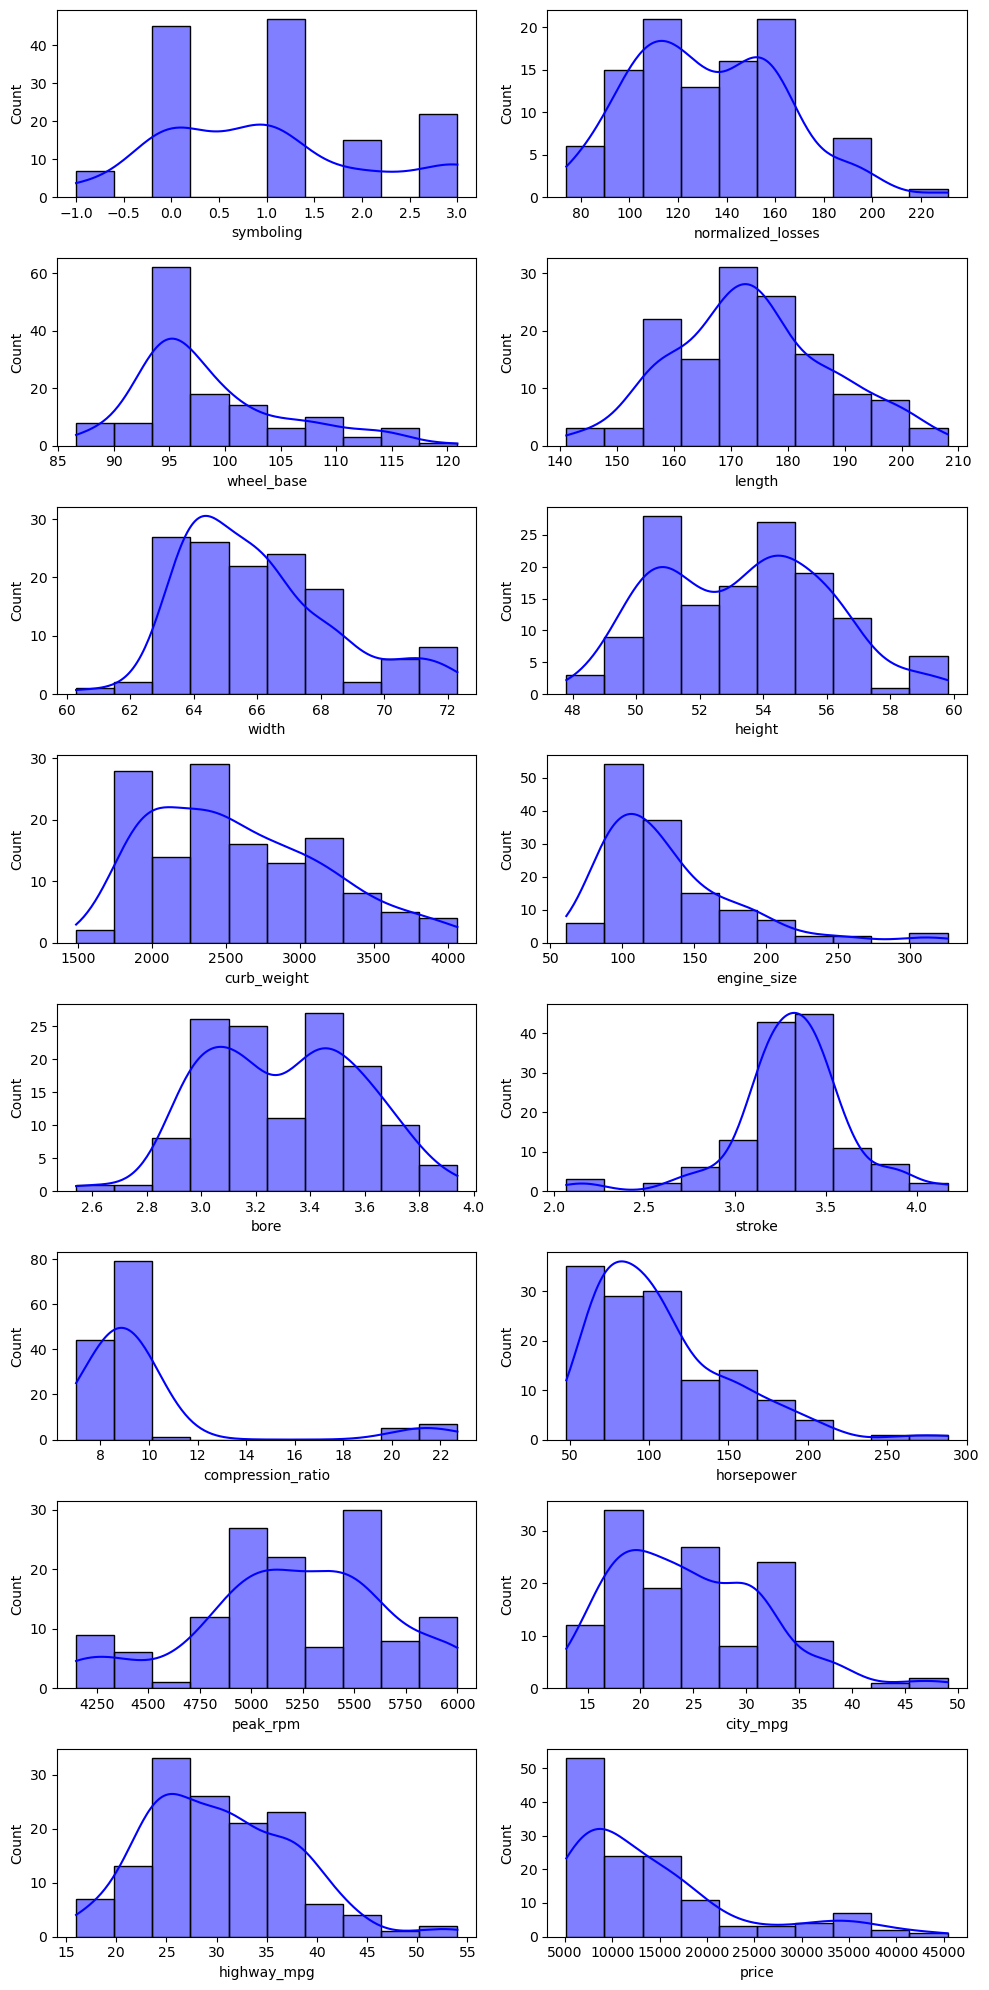

In [10]:
numeric = ["int32","int64","float32","float64"]
cols = df.select_dtypes(include = numeric).columns
fig,ax = plt.subplots(8,2,figsize = (10,20))
index = 0
for i in range(8):
    for j in range(2):
        sns.histplot(x = df[cols[index]] , ax = ax[i,j] , color = "blue",kde = True,bins=10)
        index+=1
plt.tight_layout()


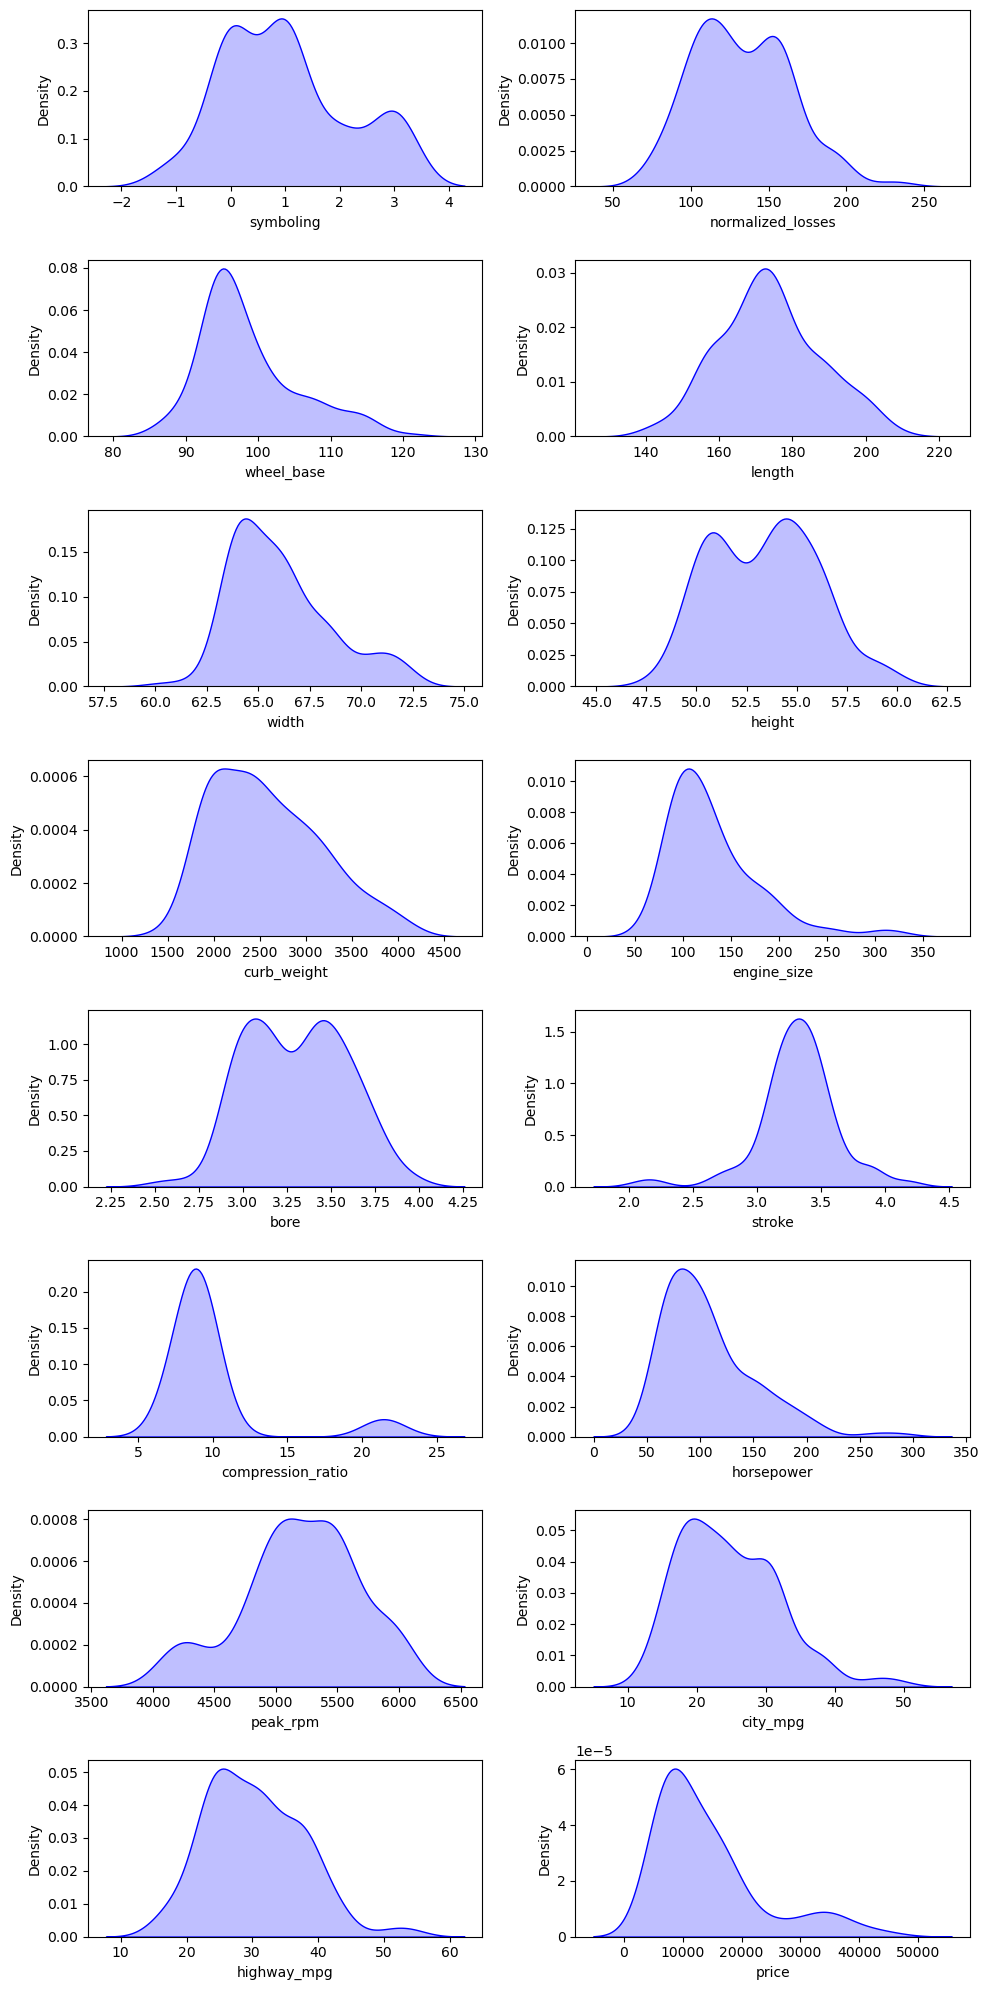

In [11]:
numeric = ["int32","int64","float32","float64"]
cols = df.select_dtypes(include = numeric).columns
fig,ax = plt.subplots(8,2,figsize = (10,20))
index = 0
for i in range(8):
    for j in range(2):
        sns.kdeplot(x = df[cols[index]] , ax = ax[i,j] , color = "blue",fill = True)
        index+=1
plt.tight_layout()


bivarient analysis

C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


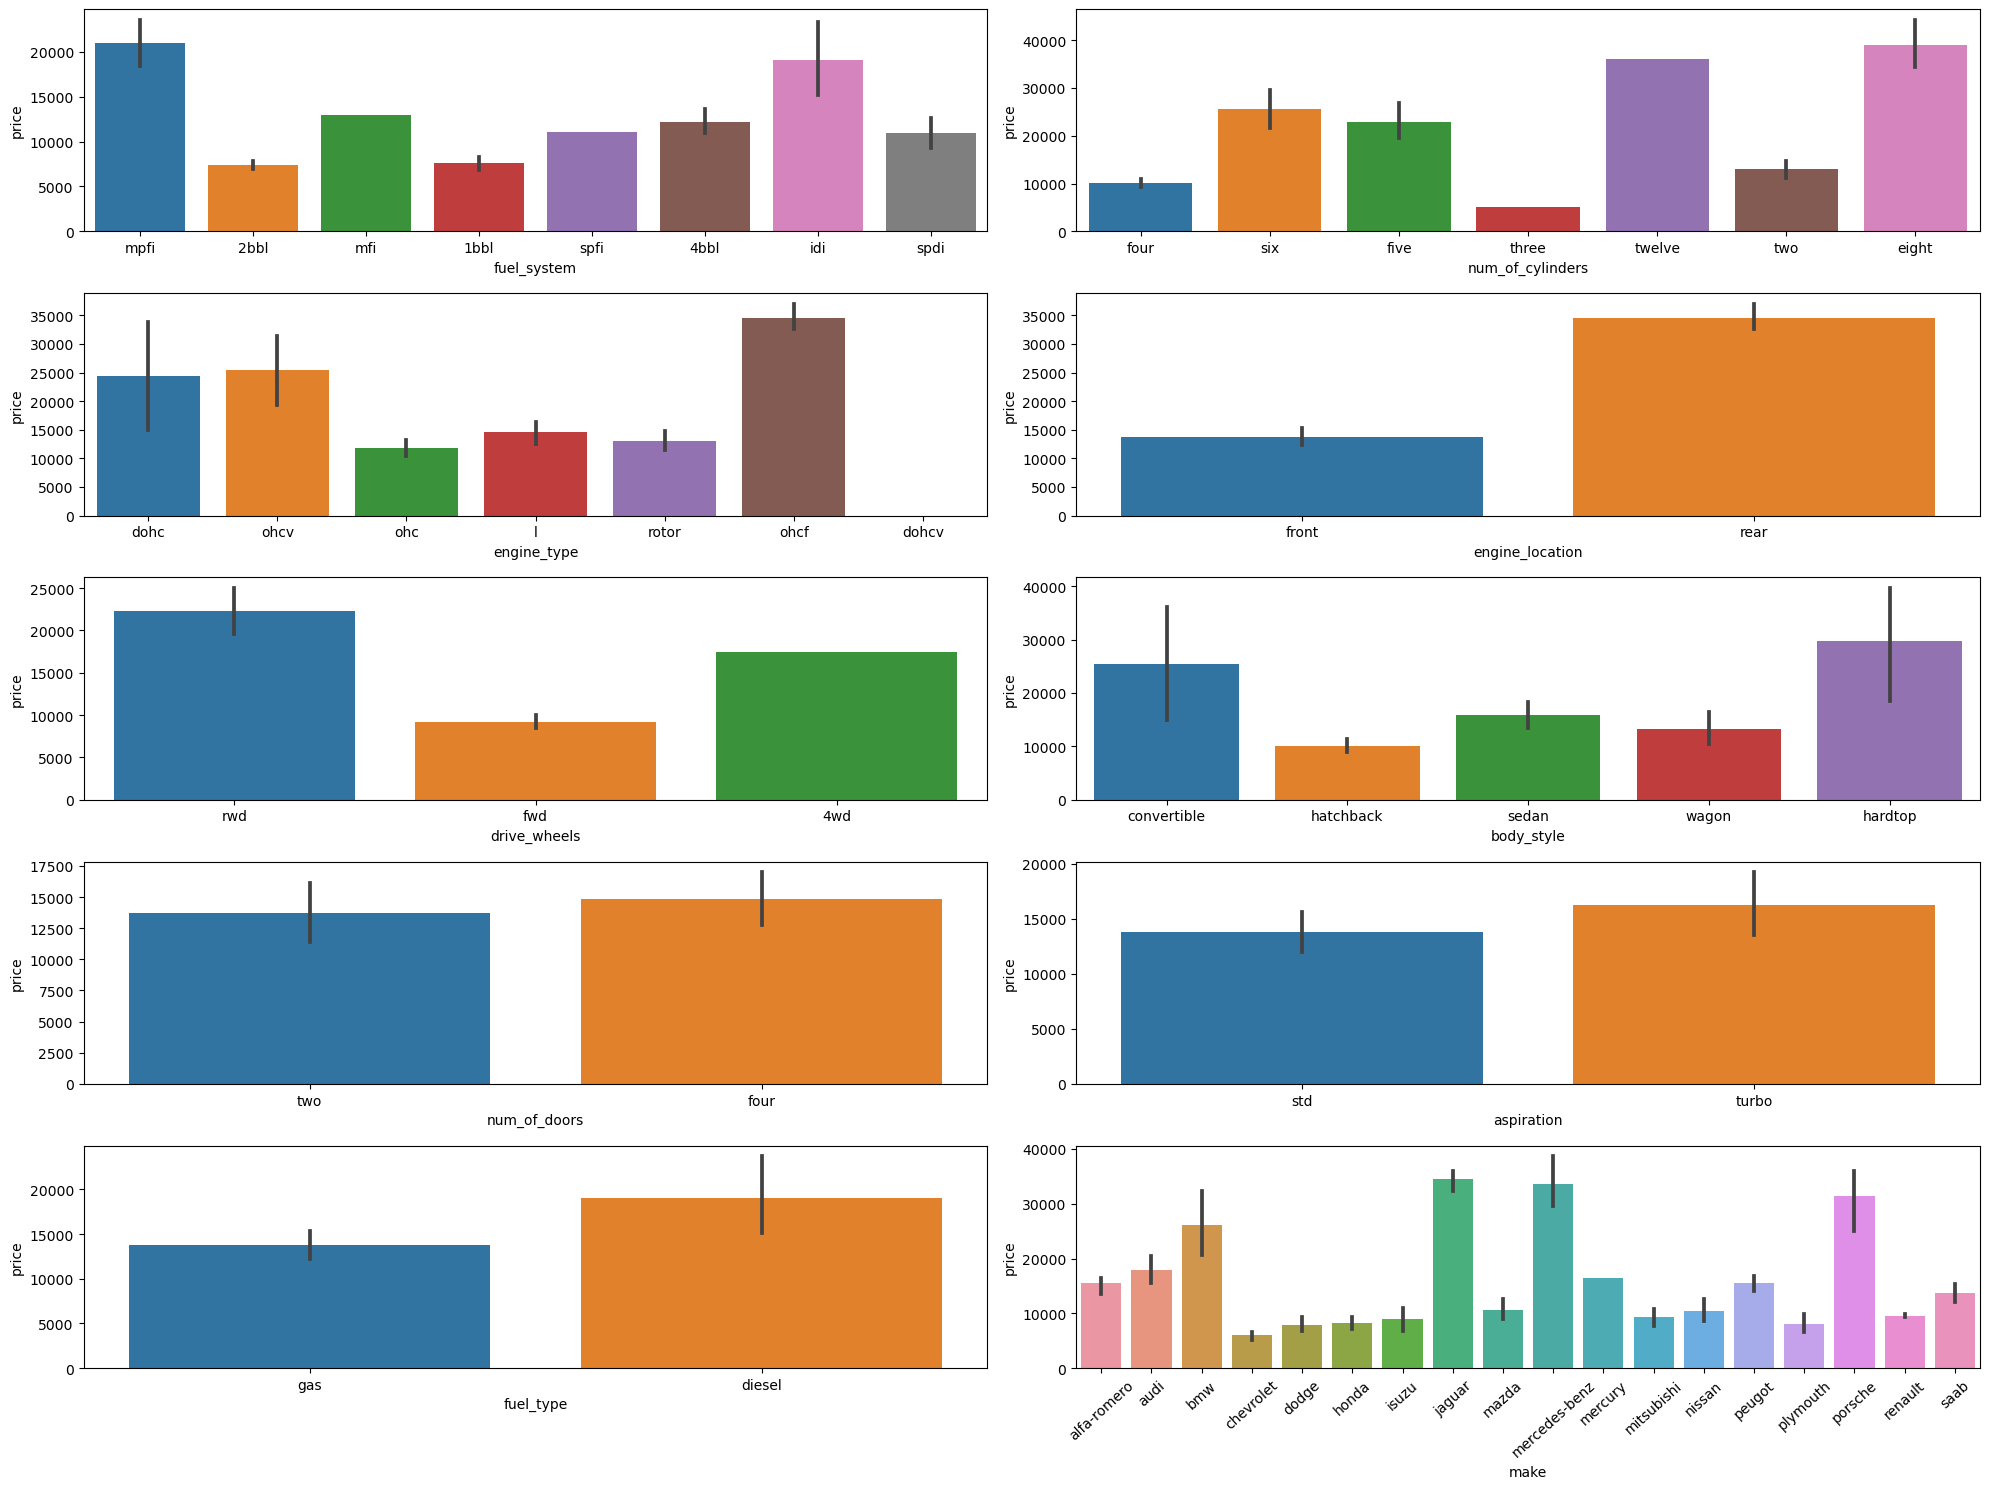

In [12]:
# categorical varieble
fig , ax = plt.subplots(5,2 , figsize = (20,15))
cols = df.select_dtypes("object").columns
cols = cols[::-1]
index = 0
for i in range(5):
    for j in range(2):
        plt.xticks(rotation=42)
        sns.barplot(x = df[cols[index]]  ,y = df["price"], ax = ax[i][j])
        index+=1
plt.tight_layout()

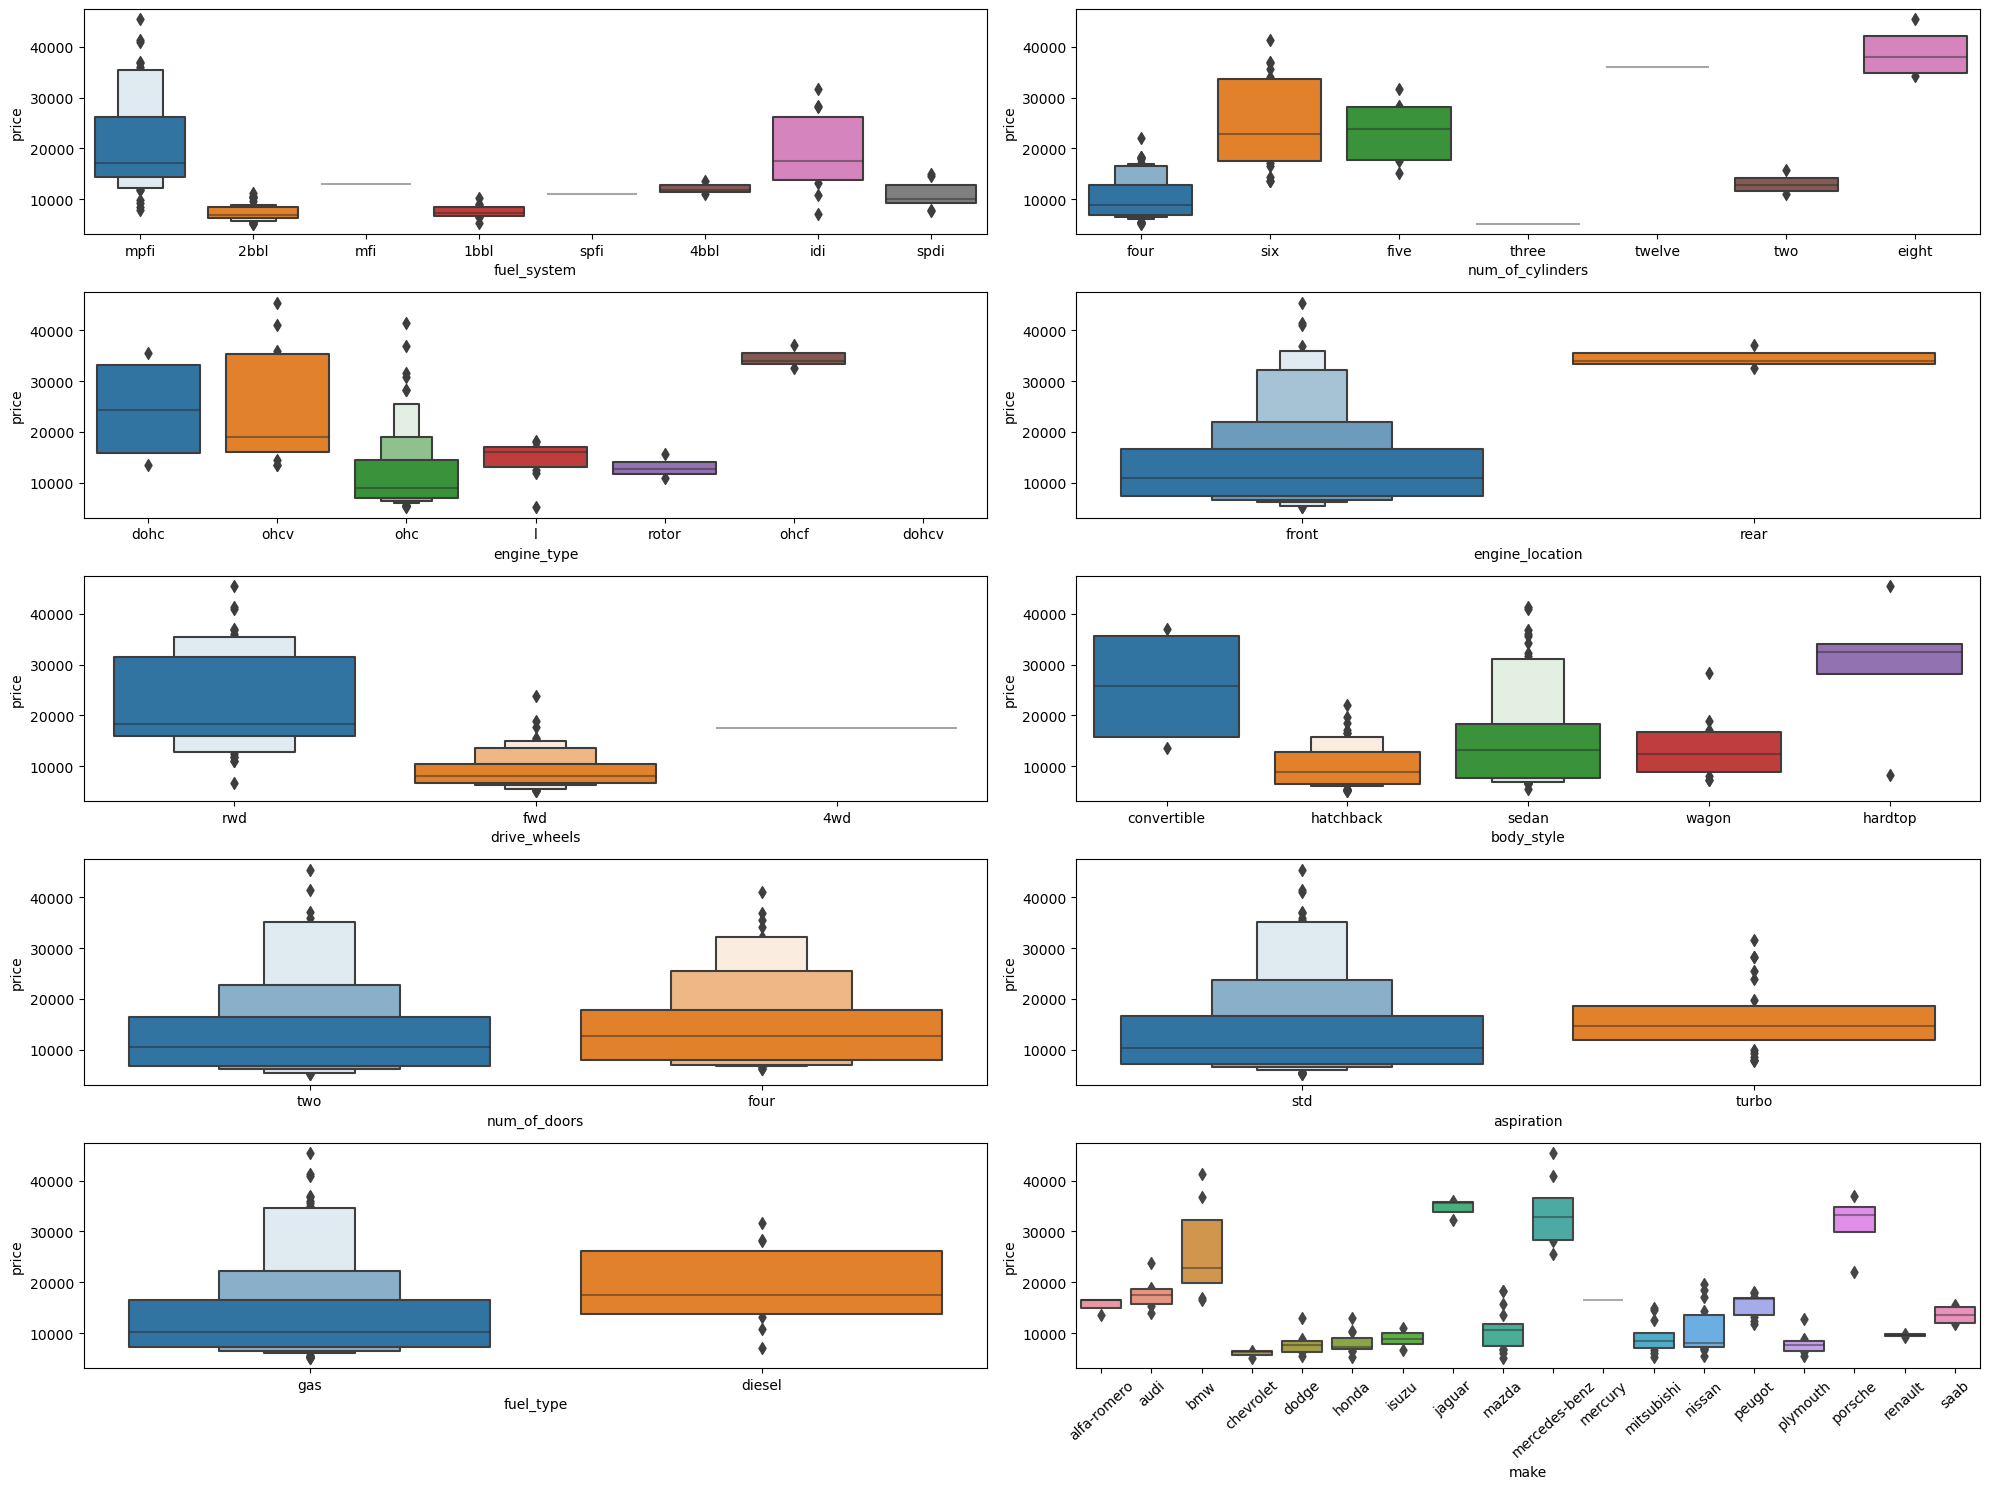

In [13]:
fig , ax = plt.subplots(5,2 , figsize = (20,15))
cols = df.select_dtypes("object").columns
cols = cols[::-1]
index = 0
for i in range(5):
    for j in range(2):
        plt.xticks(rotation=42)
        sns.boxenplot(x = df[cols[index]]  ,y = df["price"], ax = ax[i][j])
        index+=1
plt.tight_layout()

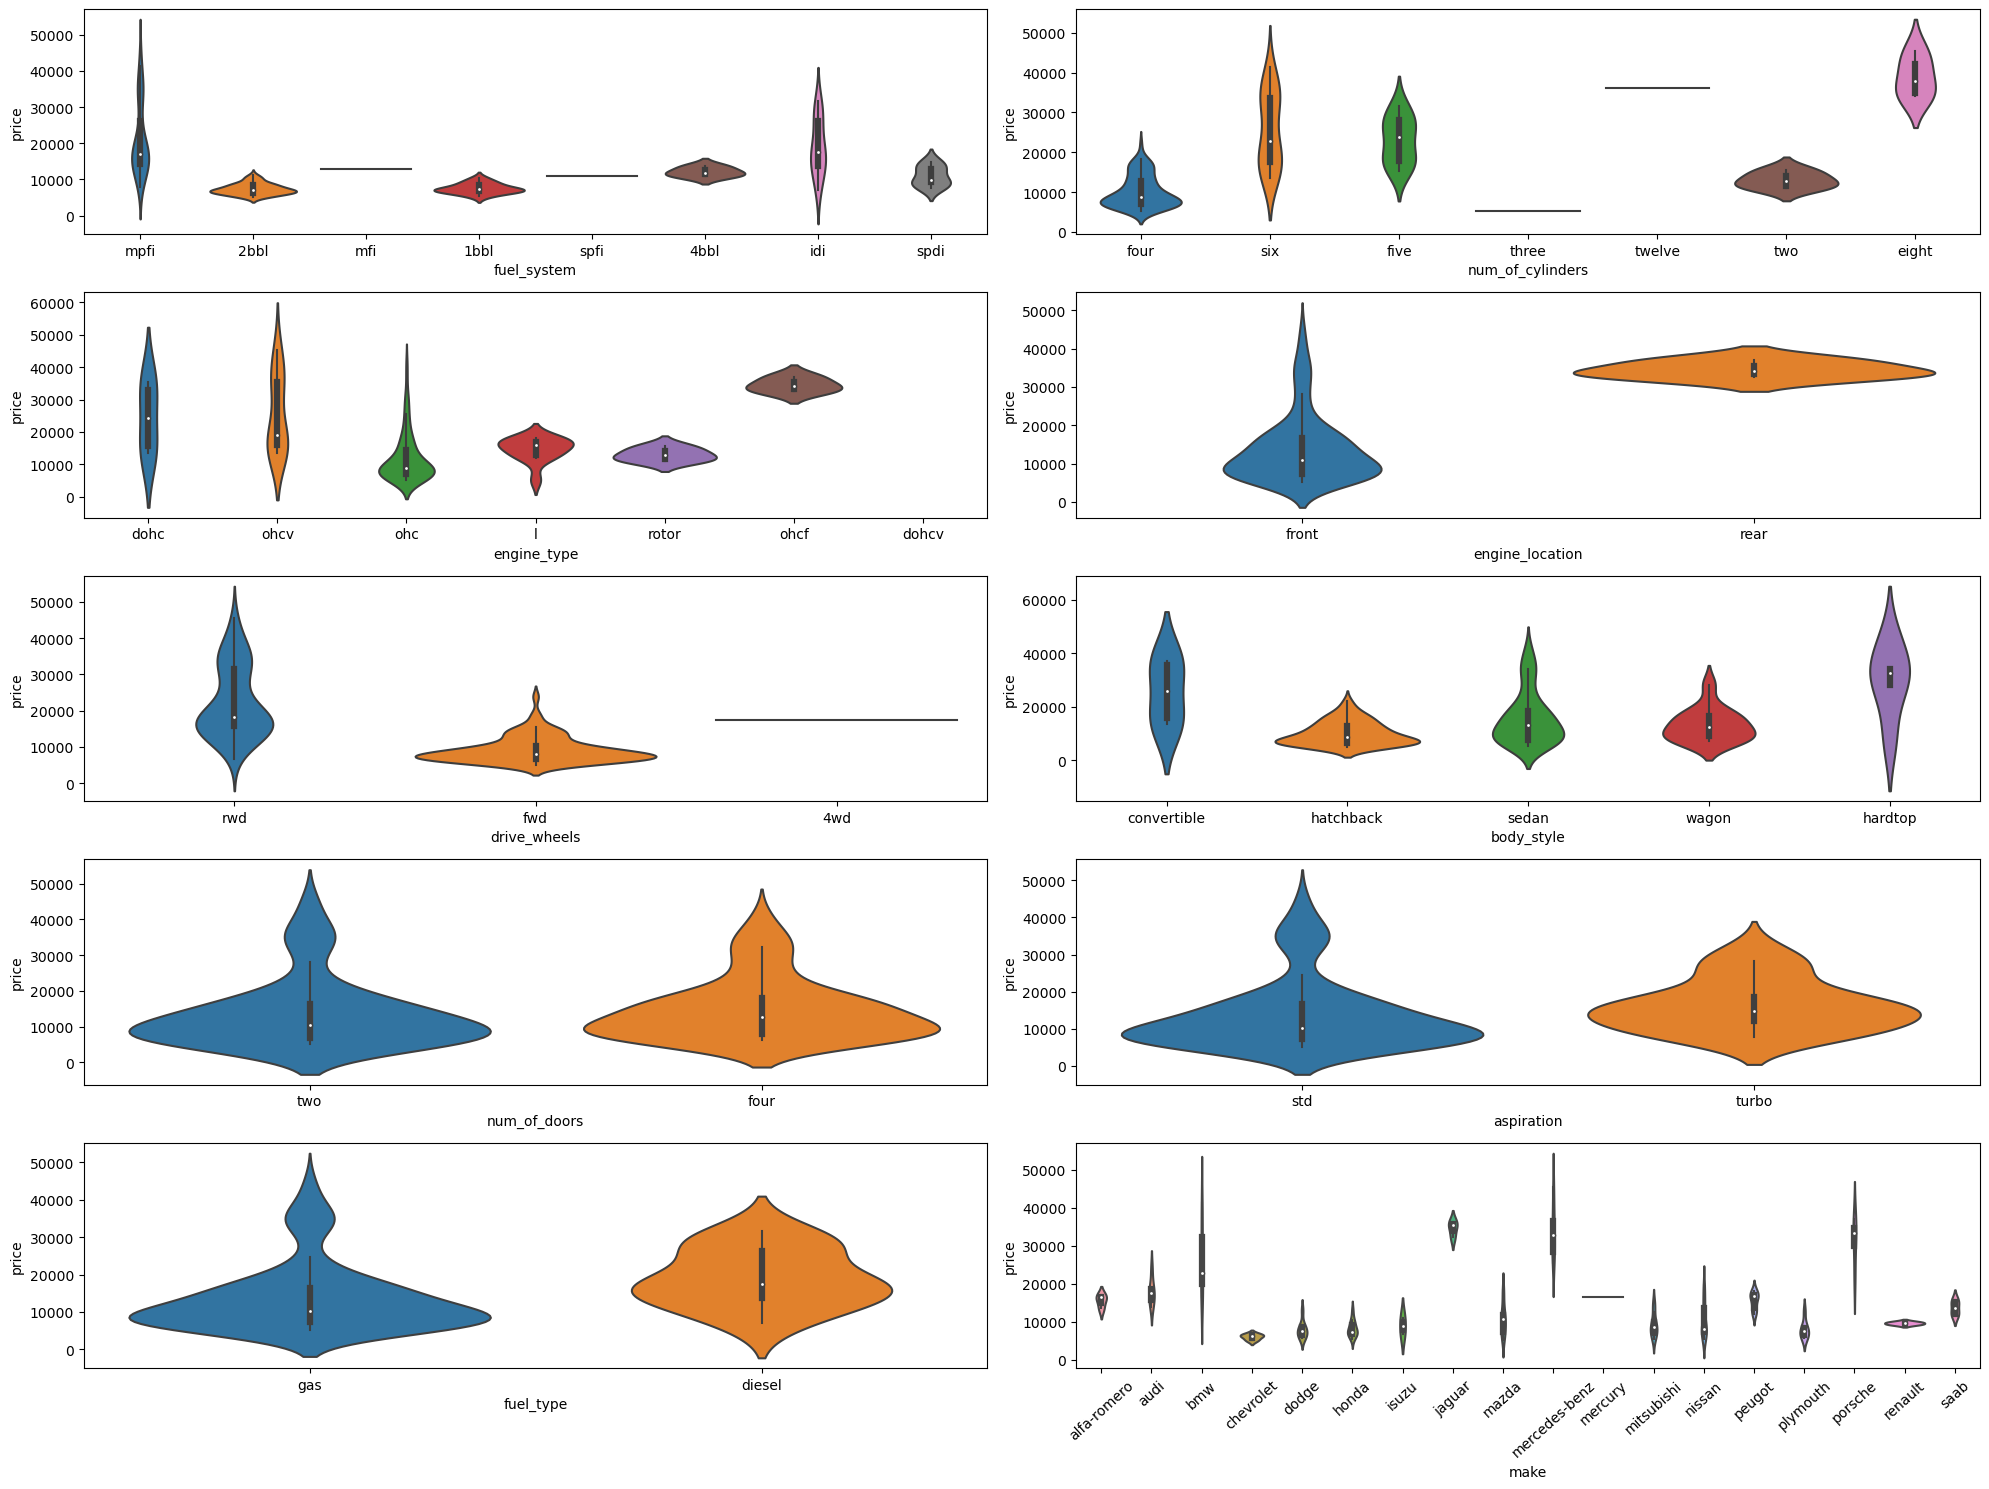

In [14]:
fig , ax = plt.subplots(5,2 , figsize = (20,15))
cols = df.select_dtypes("object").columns
cols = cols[::-1]
index = 0
for i in range(5):
    for j in range(2):
        plt.xticks(rotation=42)
        sns.violinplot(x = df[cols[index]]  ,y = df["price"], ax = ax[i][j])
        index+=1
plt.tight_layout()

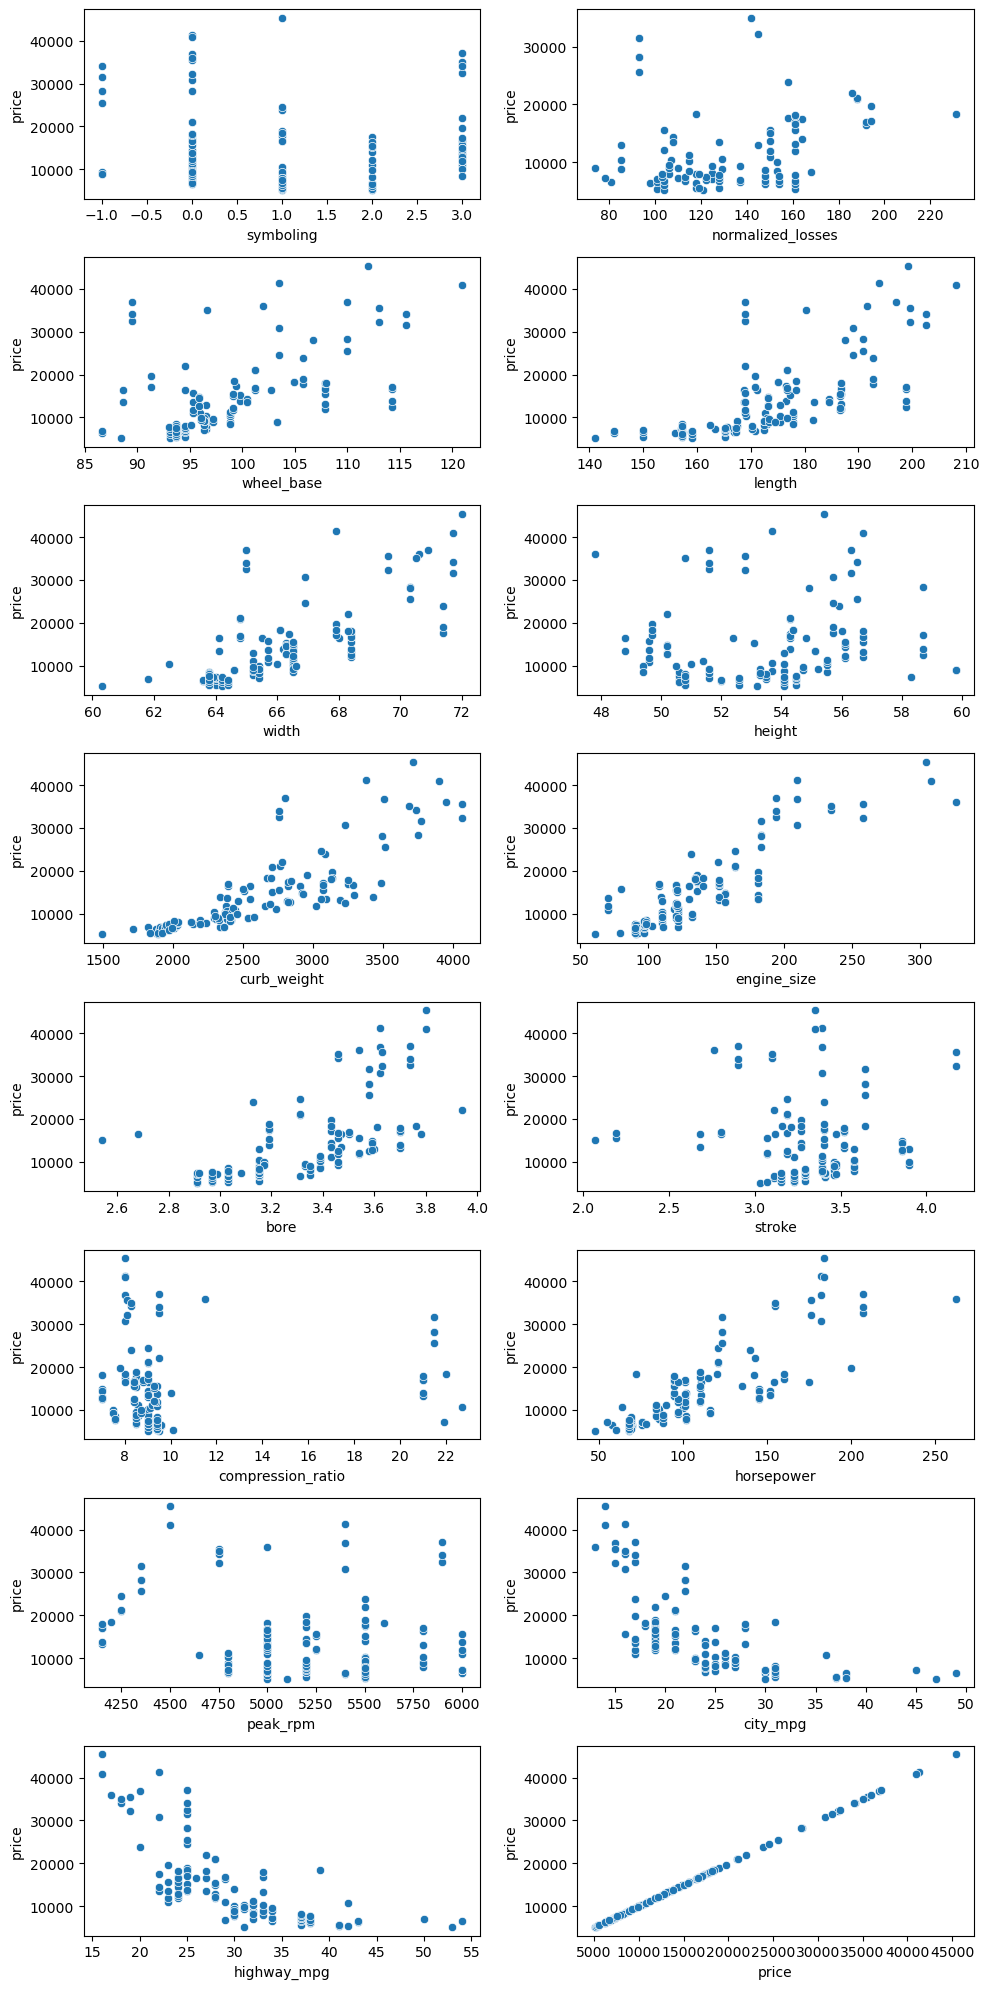

In [15]:
numeric = ["int32","int64","float32","float64"]
cols = df.select_dtypes(include = numeric).columns
fig,ax = plt.subplots(8,2,figsize = (10,20))
index = 0
for i in range(8):
    for j in range(2):
        sns.scatterplot(x = df[cols[index]] ,y=df["price"], ax = ax[i,j])
        index+=1
plt.tight_layout()


Null value analysis

In [16]:
df.isnull().sum()

symboling             0
normalized_losses    36
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [17]:
df.describe()

symboling  normalized_losses  wheel_base      length       width  \
count  136.000000         100.000000  136.000000  136.000000  136.000000   
mean     1.000000         132.520000   98.609559  173.761029   66.035294   
std      1.141798          30.746103    6.747805   13.634098    2.404857   
min     -1.000000          74.000000   86.600000  141.100000   60.300000   
25%      0.000000         106.750000   94.150000  165.300000   64.000000   
50%      1.000000         128.000000   96.300000  173.200000   65.400000   
75%      2.000000         154.000000  101.200000  182.425000   67.150000   
max      3.000000         231.000000  120.900000  208.100000   72.300000   

           height  curb_weight  engine_size        bore      stroke  \
count  136.000000   136.000000   136.000000  132.000000  132.000000   
mean    53.356618  2579.345588   131.139706    3.302652    3.312273   
std      2.627876   585.422802    48.050309    0.280354    0.310266   
min     47.800000  1488.000000    61.000000    2.540000    2.070000   
25%     50.800000  2022.250000    97.000000    3.030000    3.190000   
50%     53.600000  2434.000000   120.500000    3.330000    3.290000   
75%     55.425000  3028.250000   152.000000    3.510000    3.460000   
max     59.800000  4066.000000   326.000000    3.940000    4.170000   

       compression_ratio  horsepower     peak_rpm    city_mpg  highway_mpg  \
count         136.000000  134.000000   134.000000  136.000000   136.000000   
mean            9.915588  107.902985  5198.507463   24.705882    30.345588   
std             3.683753   42.969279   472.433323    7.103591     7.337755   
min             7.000000   48.000000  4150.000000   13.000000    16.000000   
25%             8.500000   70.000000  5000.000000   19.000000    25.000000   
50%             9.000000   97.000000  5200.000000   24.000000    30.000000   
75%             9.400000  123.000000  5500.000000   31.000000    37.000000   
max            22.700000  288.000000  6000.000000   49.000000    54.000000   

              price  
count    132.000000  
mean   14237.856061  
std     9131.825758  
min     5151.000000  
25%     7473.000000  
50%    11146.500000  
75%    16962.500000  
max    45400.000000

In [18]:
df["normalized_losses"] = df["normalized_losses"].fillna(df["normalized_losses"].median())

In [19]:
df.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         2
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 4
stroke               4
compression_ratio    0
horsepower           2
peak_rpm             2
city_mpg             0
highway_mpg          0
price                4
dtype: int64

In [20]:
df = df.dropna()

In [21]:
df.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

`Outliers analysis

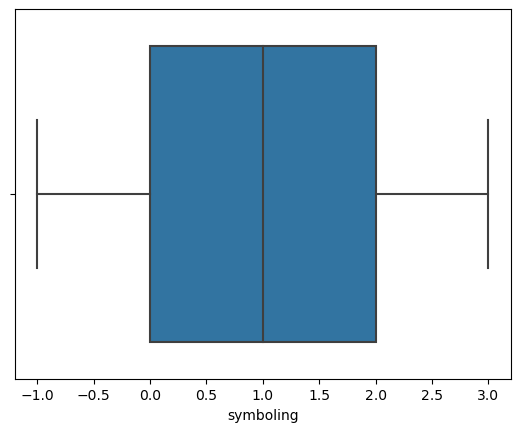

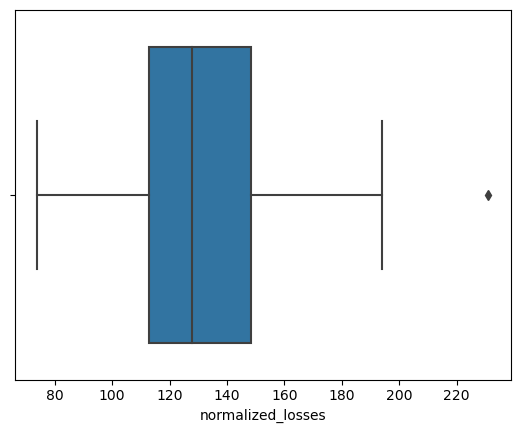

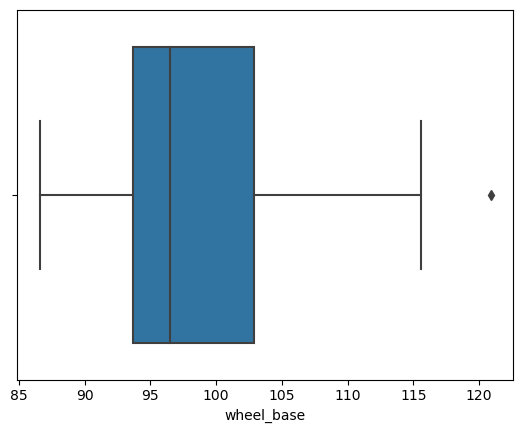

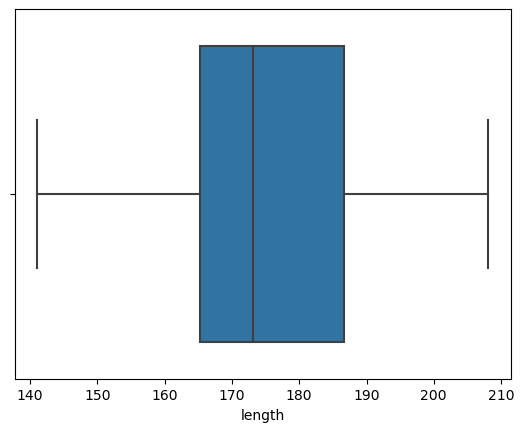

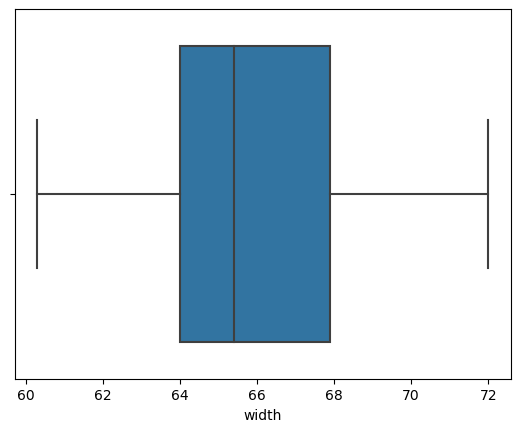

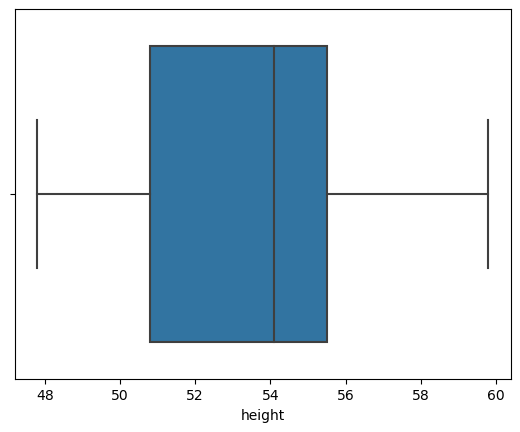

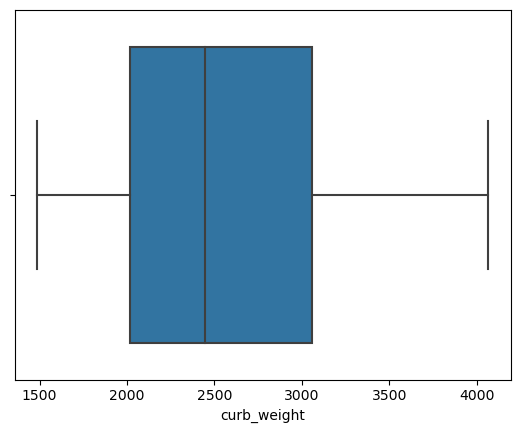

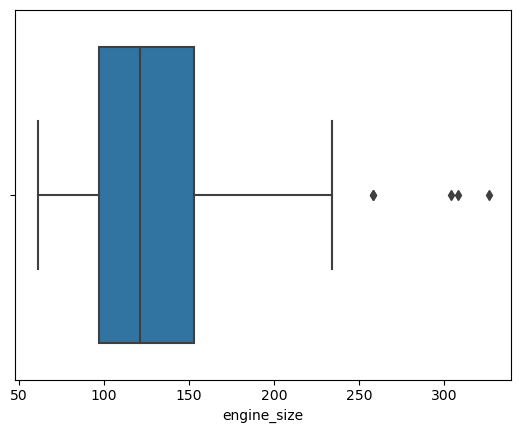

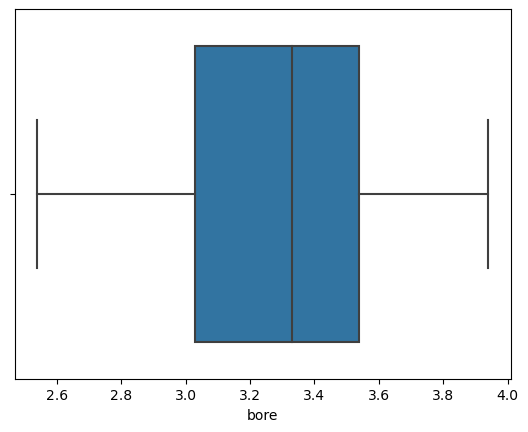

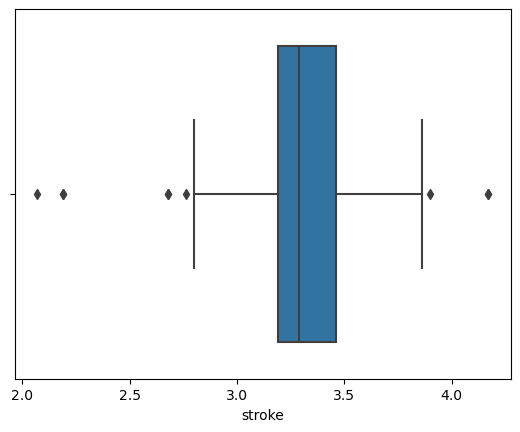

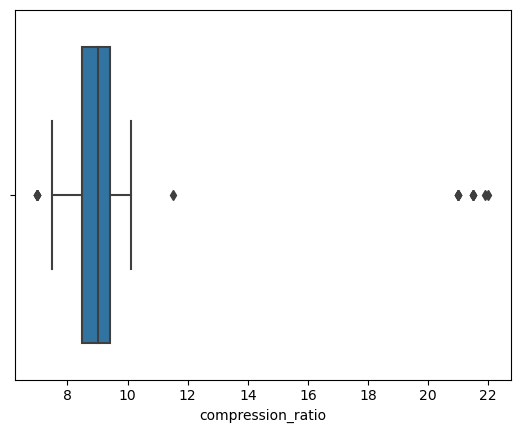

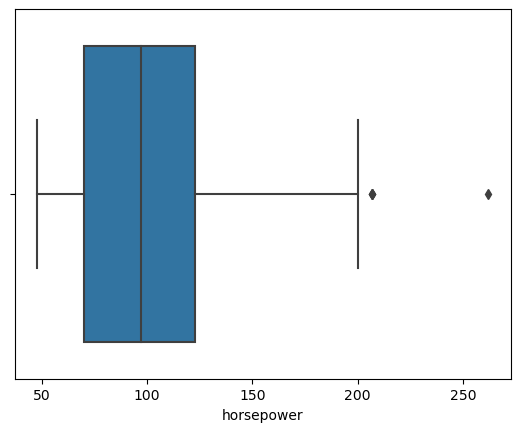

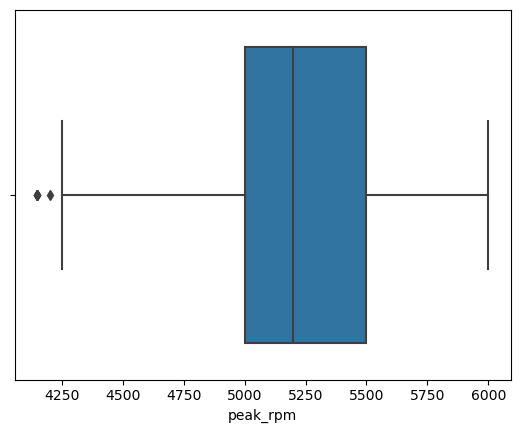

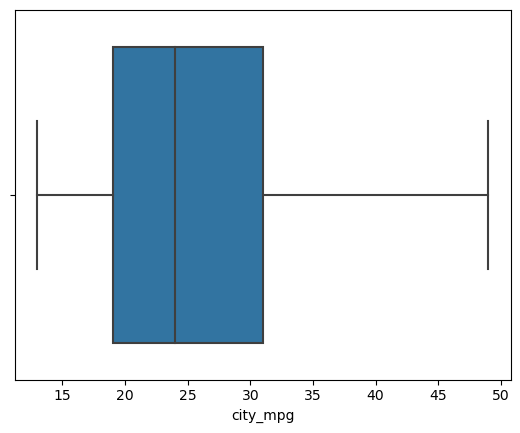

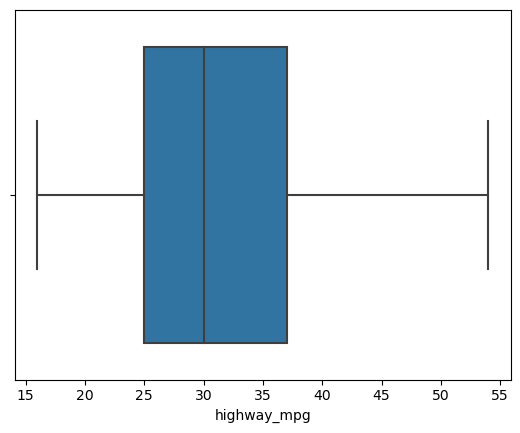

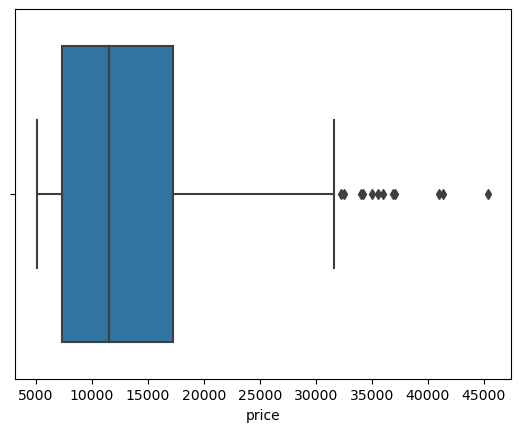

In [22]:
for i in df.select_dtypes(include = numeric).columns:
    plt.figure()
    sns.boxplot(x = df[i])

In [23]:
df1 = df.copy()

In [24]:
for i in df[["price","compression_ratio"]].columns:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    IQR = q3-q1
    df1 = df1[(df1[i]>(q1-1.5*IQR)) & (df[i]<(q3+1.5*IQR))]

C:\Users\NOOMAN KHAN\AppData\Local\Temp\ipykernel_4032\2419824182.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df1[(df1[i]>(q1-1.5*IQR)) & (df[i]<(q3+1.5*IQR))]


Feature Engineering

In [25]:
df1["num_of_doors"] = df1["num_of_doors"].replace({"two":2,"four":4})

In [26]:
df["num_of_doors"] = df["num_of_doors"].replace({"two":2,"four":4})

In [27]:
df1["num_of_cylinders"] = df1["num_of_cylinders"].replace({"three":3,"four":4,"five":5,"six":6})

In [28]:
df1["num_of_cylinders"].value_counts()

4    78
6    11
5     5
3     1
Name: num_of_cylinders, dtype: int64

In [29]:
df["num_of_cylinders"].value_counts()

four      91
six       18
five       9
eight      4
three      1
twelve     1
Name: num_of_cylinders, dtype: int64

In [30]:
df["num_of_cylinders"] = df["num_of_cylinders"].replace({"three":3,"four":4,"five":5,"six":6,"eight":8,
                                                        'twelve':12})

In [31]:
df = df.drop("make",axis = 1)
df1 = df1.drop("make",axis = 1)

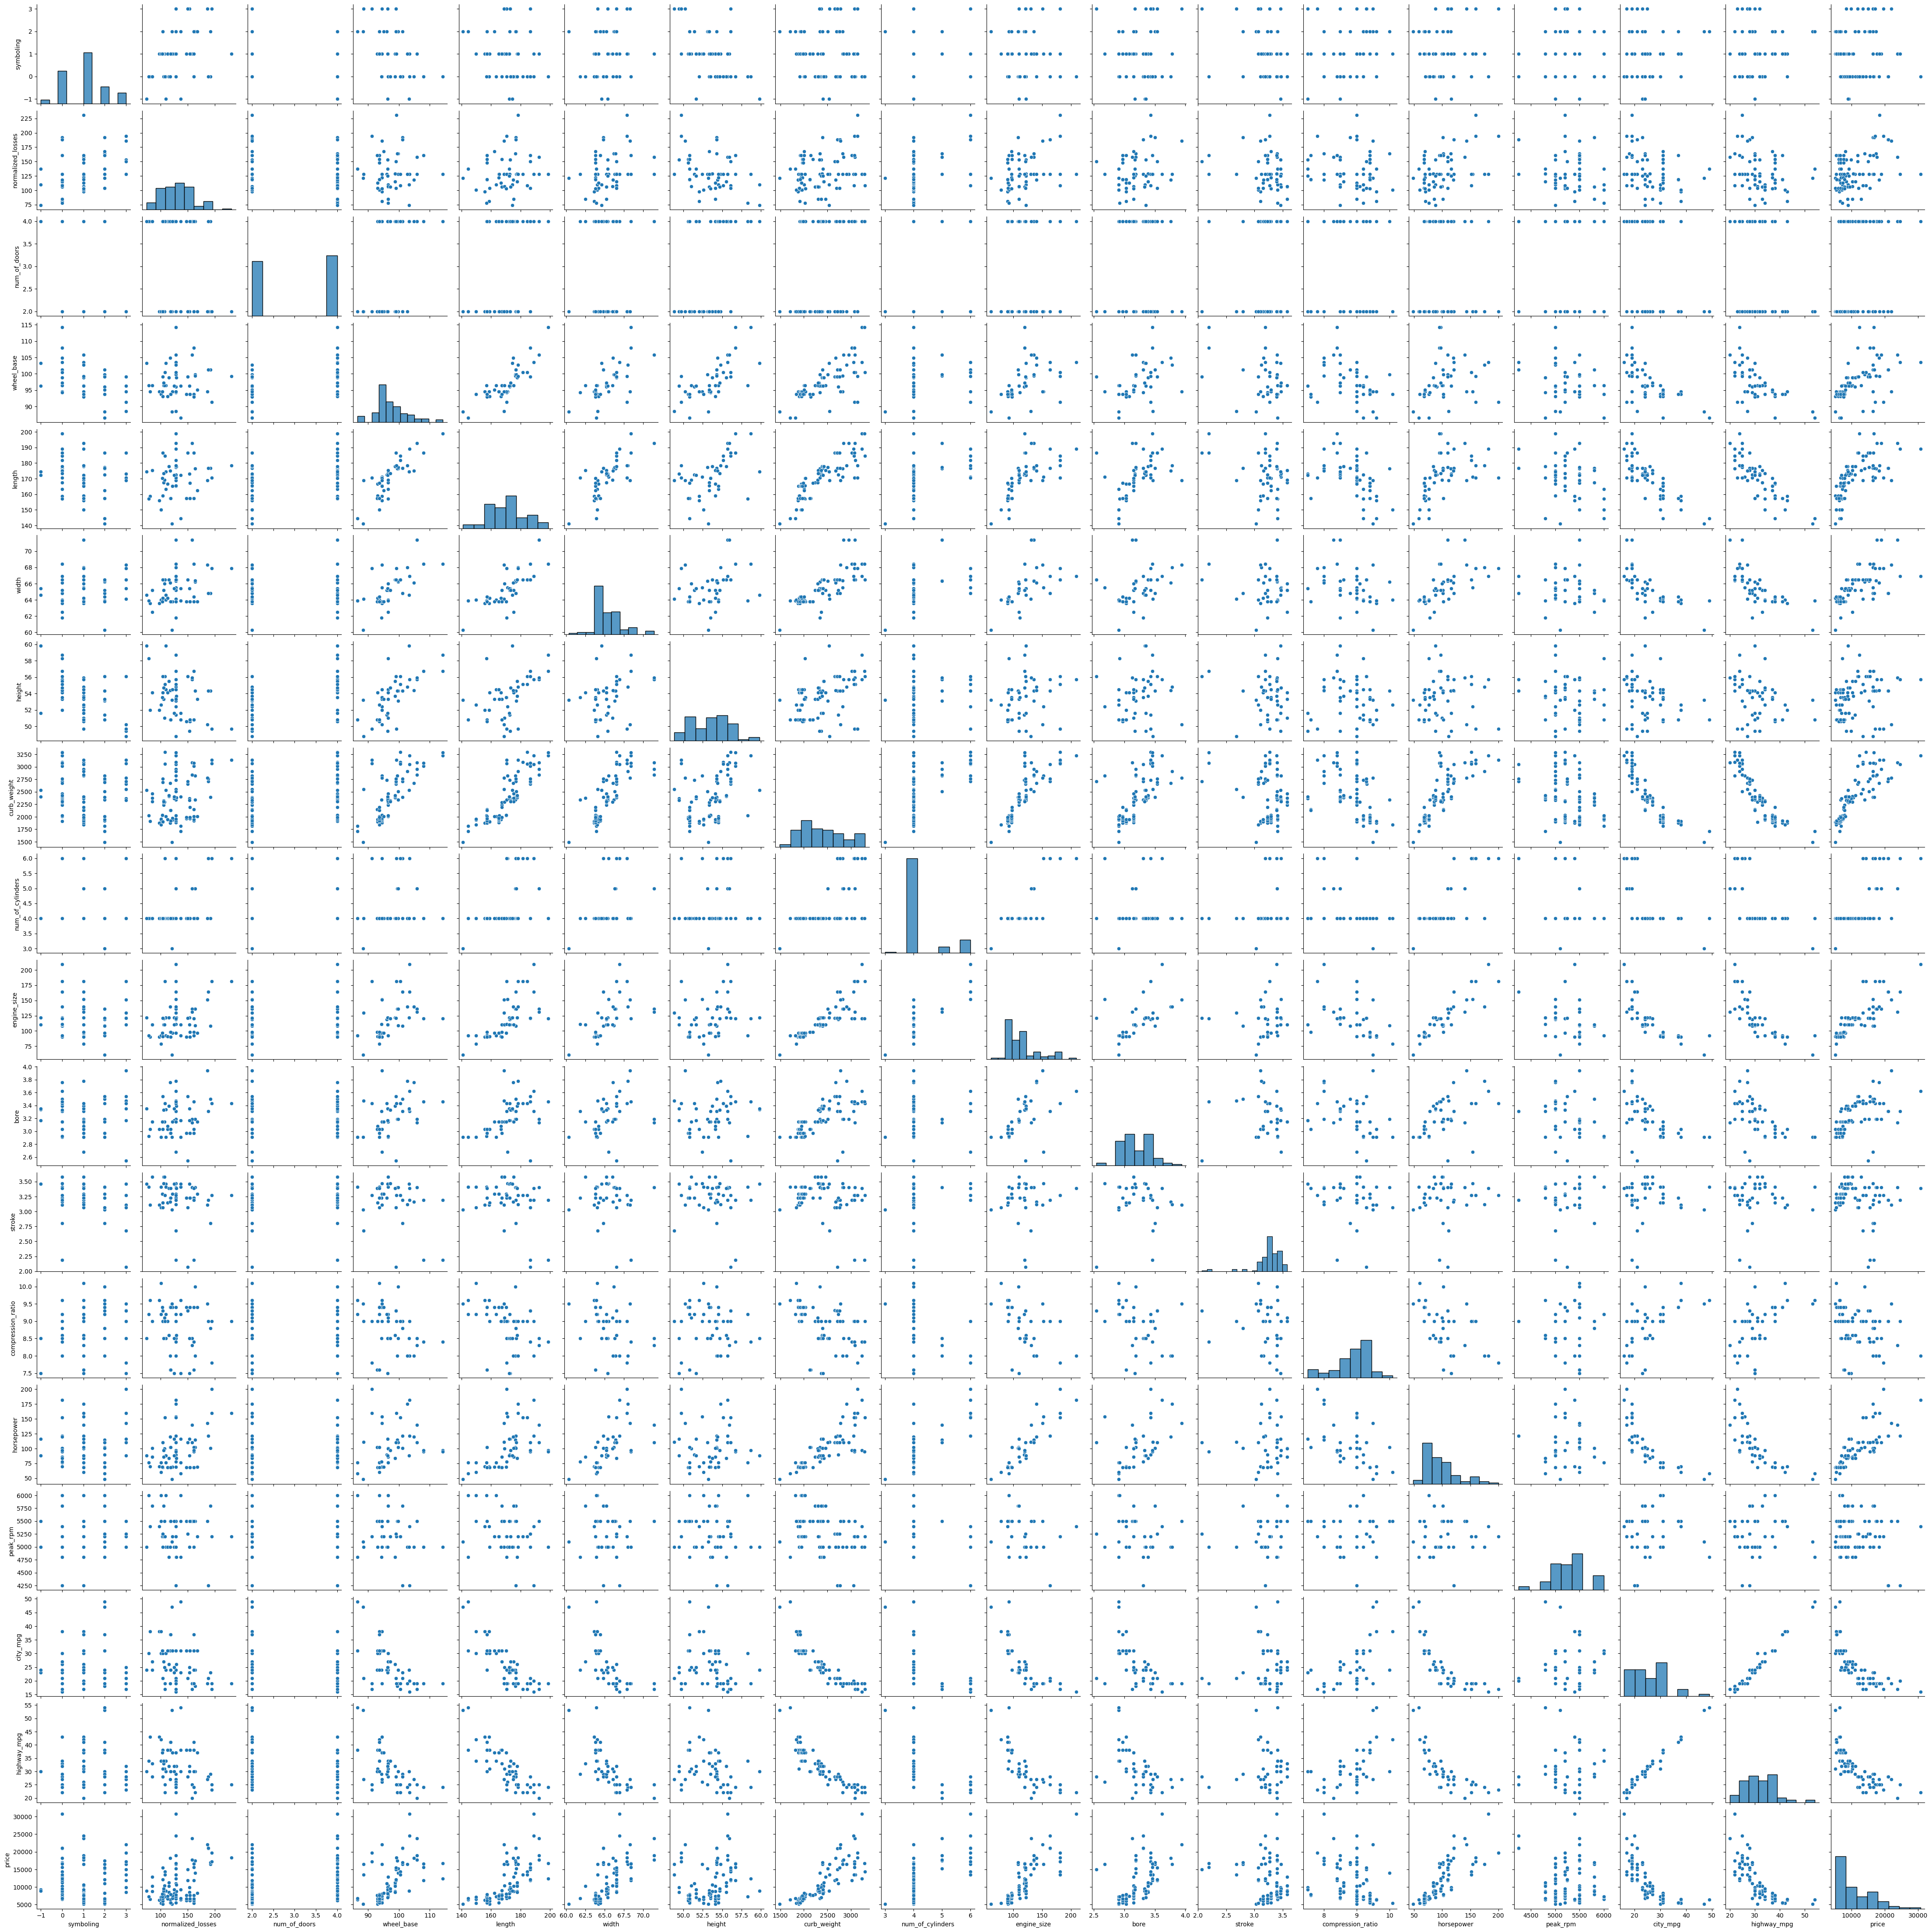

In [32]:
sns.pairplot(df1)

In [33]:
df.corr()

symboling  normalized_losses  num_of_doors  wheel_base  \
symboling           1.000000           0.328473     -0.612486   -0.576608   
normalized_losses   0.328473           1.000000     -0.137476    0.030254   
num_of_doors       -0.612486          -0.137476      1.000000    0.486938   
wheel_base         -0.576608           0.030254      0.486938    1.000000   
length             -0.353030           0.081898      0.434069    0.879836   
width              -0.228467           0.154573      0.232025    0.796881   
height             -0.617238          -0.256702      0.553939    0.675451   
curb_weight        -0.230093           0.149347      0.243383    0.781631   
num_of_cylinders   -0.093316           0.123790     -0.036193    0.327949   
engine_size        -0.105051           0.113403      0.045332    0.556427   
bore               -0.054498           0.142218      0.147750    0.552137   
stroke             -0.178770          -0.199644      0.100510    0.145475   
compression_ratio  -0.312602          -0.095949      0.162904    0.359471   
horsepower          0.115314           0.192380     -0.088044    0.320111   
peak_rpm            0.272507          -0.051717     -0.191583   -0.534225   
city_mpg           -0.004056          -0.213725     -0.129477   -0.503390   
highway_mpg         0.058540          -0.162394     -0.139373   -0.592433   
price              -0.083526           0.131147      0.058522    0.565090   

                     length     width    height  curb_weight  \
symboling         -0.353030 -0.228467 -0.617238    -0.230093   
normalized_losses  0.081898  0.154573 -0.256702     0.149347   
num_of_doors       0.434069  0.232025  0.553939     0.243383   
wheel_base         0.879836  0.796881  0.675451     0.781631   
length             1.000000  0.852196  0.552945     0.888320   
width              0.852196  1.000000  0.365714     0.884538   
height             0.552945  0.365714  1.000000     0.328454   
curb_weight        0.888320  0.884538  0.328454     1.000000   
num_of_cylinders   0.469212  0.561633 -0.044481     0.644259   
engine_size        0.699399  0.742624  0.090694     0.874163   
bore               0.680651  0.620912  0.244525     0.751716   
stroke             0.072301  0.134091 -0.013476     0.140206   
compression_ratio  0.240288  0.260565  0.345871     0.269738   
horsepower         0.551859  0.610282 -0.079425     0.761384   
peak_rpm          -0.500662 -0.431260 -0.358879    -0.501844   
city_mpg          -0.726290 -0.680099 -0.140512    -0.795303   
highway_mpg       -0.774913 -0.749831 -0.204558    -0.855108   
price              0.694884  0.745148  0.166217     0.835160   

                   num_of_cylinders  engine_size      bore    stroke  \
symboling                 -0.093316    -0.105051 -0.054498 -0.178770   
normalized_losses          0.123790     0.113403  0.142218 -0.199644   
num_of_doors              -0.036193     0.045332  0.147750  0.100510   
wheel_base                 0.327949     0.556427  0.552137  0.145475   
length                     0.469212     0.699399  0.680651  0.072301   
width                      0.561633     0.742624  0.620912  0.134091   
height                    -0.044481     0.090694  0.244525 -0.013476   
curb_weight                0.644259     0.874163  0.751716  0.140206   
num_of_cylinders           1.000000     0.867108  0.349253 -0.062970   
engine_size                0.867108     1.000000  0.683541  0.144056   
bore                       0.349253     0.683541  1.000000  0.121350   
stroke                    -0.062970     0.144056  0.121350  1.000000   
compression_ratio         -0.032183     0.107228  0.215032  0.184039   
horsepower                 0.771399     0.871125  0.645883  0.034631   
peak_rpm                  -0.188952    -0.389779 -0.443696 -0.176459   
city_mpg                  -0.569891    -0.730060 -0.660065 -0.003383   
highway_mpg               -0.603719    -0.773125 -0.671292 -0.048429   
price                      0.769382     0.

<AxesSubplot: >

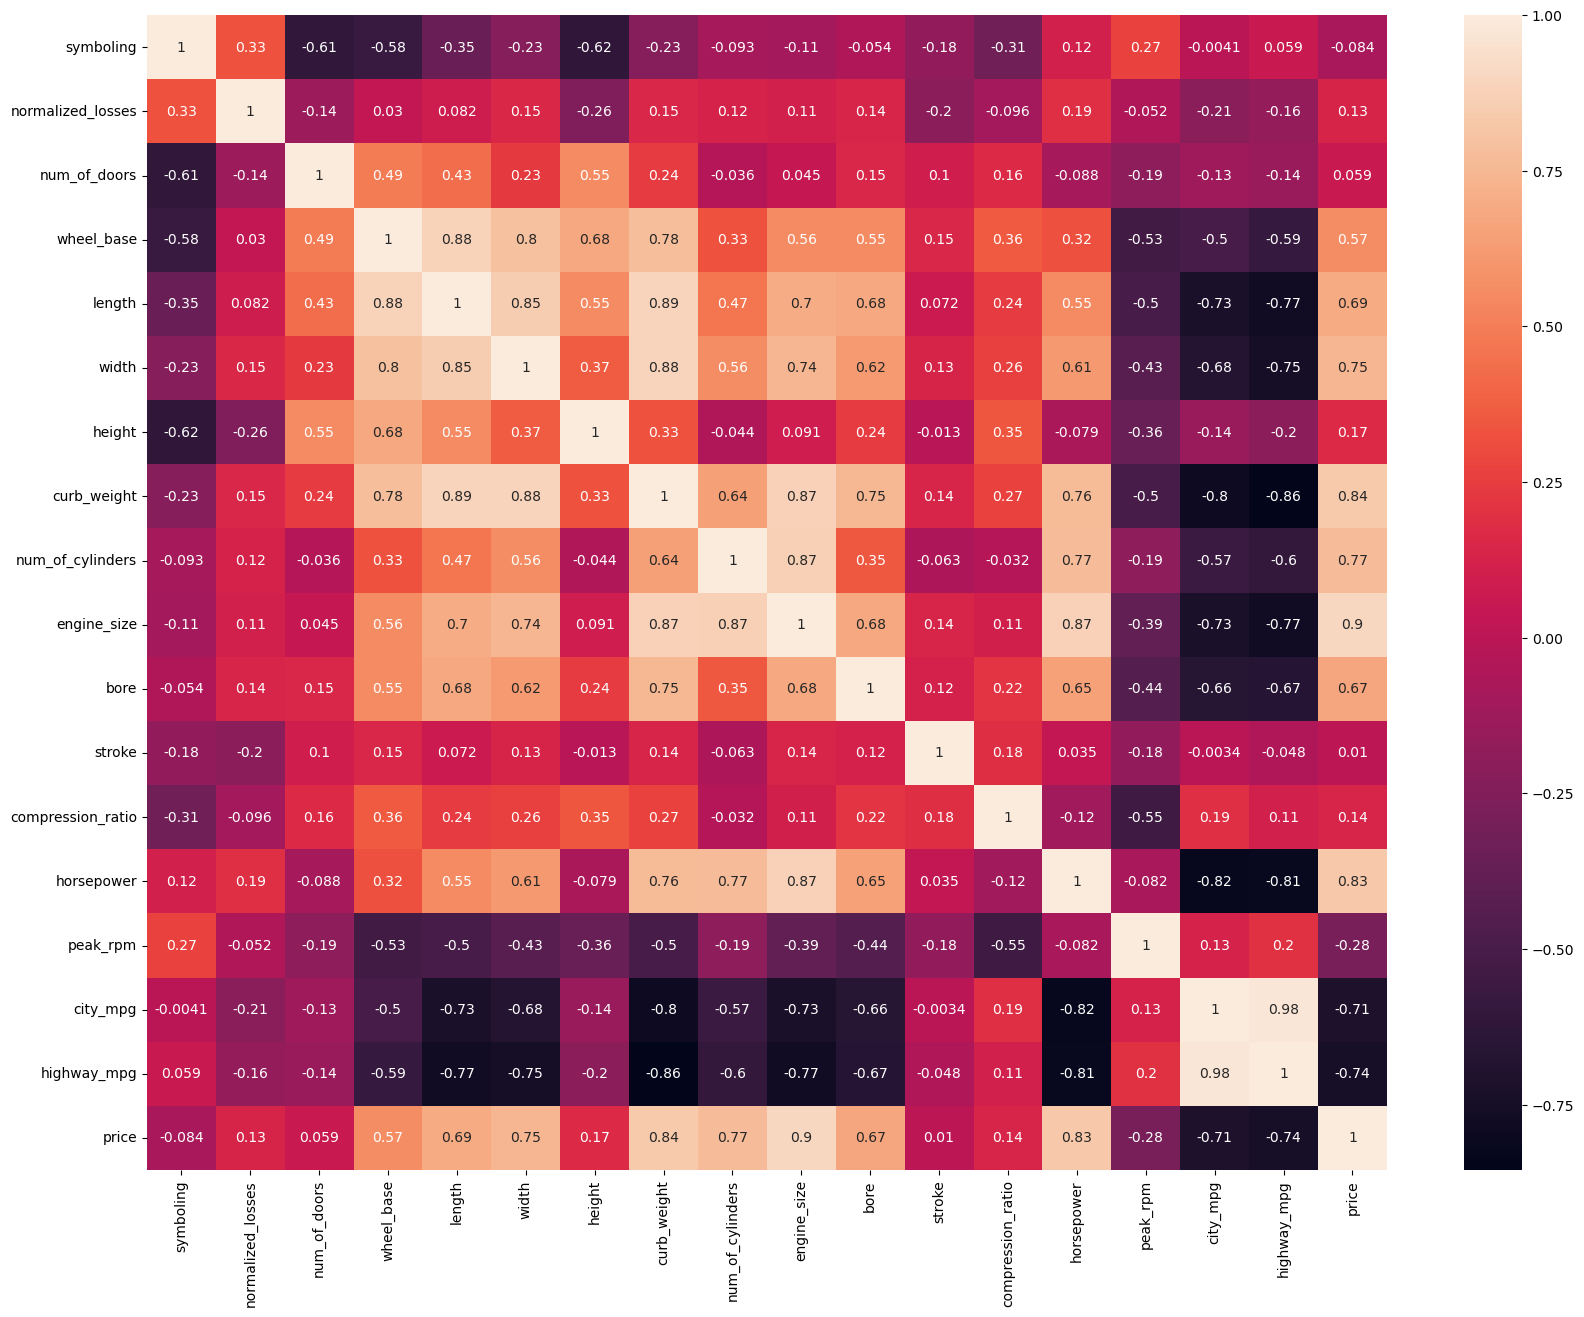

In [34]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr() , annot = True)

Feature selection based on corelation

In [35]:
def corelation(df,theresold):
    column = []
    corr_mat = df.corr()
    for i in df.corr().columns:
        if abs(corr_mat.loc["price",i])<theresold:
            column.append(i)
    return column
            
            
        

In [36]:

corelation(df,0.4)

['symboling',
 'normalized_losses',
 'num_of_doors',
 'height',
 'stroke',
 'compression_ratio',
 'peak_rpm']

In [37]:
df1 = df1.drop(['symboling',
 'normalized_losses',
 'num_of_doors',
 'stroke',] , axis = 1)

In [38]:
df = df.drop(['symboling',
 'normalized_losses',
 'num_of_doors',
 'stroke',] , axis = 1)

Encode categorible varieble with label Encoder beacuse all categorical varieble is nominal

In [39]:
df1.select_dtypes("object")

fuel_type aspiration   body_style drive_wheels engine_location  \
0         gas        std  convertible          rwd           front   
1         gas        std  convertible          rwd           front   
2         gas        std    hatchback          rwd           front   
3         gas        std        sedan          fwd           front   
4         gas        std        sedan          4wd           front   
..        ...        ...          ...          ...             ...   
125       gas        std    hatchback          rwd           front   
132       gas        std    hatchback          fwd           front   
133       gas        std        sedan          fwd           front   
134       gas        std    hatchback          fwd           front   
135       gas        std        sedan          fwd           front   

    engine_type fuel_system  
0          dohc        mpfi  
1          dohc        mpfi  
2          ohcv        mpfi  
3           ohc        mpfi  
4           ohc        mpfi  
..          ...         ...  
125         ohc        mpfi  
132         ohc        mpfi  
133         ohc        mpfi  
134         ohc        mpfi  
135         ohc        mpfi  

[95 rows x 7 columns]

In [40]:
from sklearn.preprocessing import LabelEncoder
fuel_type_encoder = LabelEncoder()
df["fuel_type"] = fuel_type_encoder.fit_transform(df["fuel_type"])
df1["fuel_type"] = fuel_type_encoder.transform(df1["fuel_type"])

In [41]:
from sklearn.preprocessing import LabelEncoder
aspiration_encoder = LabelEncoder()
df["aspiration"] = aspiration_encoder.fit_transform(df["aspiration"])
df1["aspiration"] = aspiration_encoder.transform(df1['aspiration'])



In [42]:
from sklearn.preprocessing import LabelEncoder
body_style_encoder = LabelEncoder()
df["body_style"] = body_style_encoder.fit_transform(df["body_style"])
df1["body_style"] = body_style_encoder.transform(df1['body_style'])

In [43]:
from sklearn.preprocessing import LabelEncoder
driver_wheels_encoder = LabelEncoder()
df["drive_wheels"] = driver_wheels_encoder.fit_transform(df["drive_wheels"])
df1["drive_wheels"] = driver_wheels_encoder.transform(df1['drive_wheels'])

In [44]:
from sklearn.preprocessing import LabelEncoder
engine_location_encoder = LabelEncoder()
df["engine_location"] = engine_location_encoder.fit_transform(df["engine_location"])
df1["engine_location"] = engine_location_encoder.transform(df1["engine_location"])

In [45]:
from sklearn.preprocessing import LabelEncoder
engine_type_encoder = LabelEncoder()
df["engine_type"] = engine_type_encoder.fit_transform(df["engine_type"])
df1["engine_type"] = engine_type_encoder.transform(df1["engine_type"])

In [46]:
from sklearn.preprocessing import LabelEncoder
fuel_system_encoder = LabelEncoder()
df["fuel_system"] = fuel_system_encoder.fit_transform(df["fuel_system"])
df1["fuel_system"] = fuel_system_encoder.transform(df1["fuel_system"])

data is ready for model building

split data into train and test

In [47]:
X = df.drop("price" , axis = 1)
Y = df[["price"]]

In [48]:
X1 = df1.drop("price" , axis = 1)
Y1 = df1[["price"]]

In [49]:
from sklearn.model_selection import train_test_split
X_train , X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=1)


In [50]:
from sklearn.model_selection import train_test_split
X_train1 , X_test1,Y_train1,Y_test1 = train_test_split(X1,Y1,test_size = 0.2,random_state=1)

Linear Regression

Without outliers remove

In [51]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)

In [52]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_s,Y_train)

LinearRegression()

In [53]:
print("The intercept is " , regressor.intercept_)
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regressor.coef_[0][idx]))

The intercept is  [14797.78787879]
The coefficient for fuel_type is 490.8033291479033
The coefficient for aspiration is -9.380766360395183
The coefficient for body_style is -370.2231257126589
The coefficient for drive_wheels is 1658.310937525389
The coefficient for engine_location is 957.4353706791571
The coefficient for wheel_base is 261.2021992677188
The coefficient for length is 1077.3587355831899
The coefficient for width is 2233.198488514014
The coefficient for height is 560.1980539043561
The coefficient for curb_weight is -2826.080882781416
The coefficient for engine_type is -1994.6080811401505
The coefficient for num_of_cylinders is 3249.8248263040814
The coefficient for engine_size is 3794.275191832841
The coefficient for fuel_system is 505.5245631915963
The coefficient for bore is -121.71246896741812
The coefficient for compression_ratio is 1636.8046019231945
The coefficient for horsepower is 1329.3181967001713
The coefficient for peak_rpm is 1485.0639953735501
The coefficient

test accuracy

In [54]:
# root mean squared error
from sklearn import metrics 
Y_pred = regressor.predict(X_test_s)
np.sqrt(metrics.mean_squared_error(Y_pred,Y_test))

4839.968384594668

In [55]:
# r2_score
Y_pred = regressor.predict(X_test_s)
metrics.r2_score(Y_pred,Y_test)

0.8489729049207378

train accuracy

In [56]:
# root mean squared error
Y_pred = regressor.predict(X_train_s)
np.sqrt(metrics.mean_squared_error(Y_pred,Y_train))

2442.681399754665

In [57]:
# r2_score
Y_pred = regressor.predict(X_train_s)
metrics.r2_score(Y_pred,Y_train)

0.9227280045528413

Both train and test is same no overfitting in linear regression

With outliers remove

In [58]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train1)
X_test_s = sc.transform(X_test1)

In [59]:
# train model
from sklearn.linear_model import LinearRegression
le = LinearRegression()
le.fit(X_train_s,Y_train1)

LinearRegression()

In [60]:
# root mean squared error 
from sklearn import metrics 
Y_pred = le.predict(X_test_s)
np.sqrt(metrics.mean_squared_error(Y_pred,Y_test1))

2018.3308688671978

In [61]:
Y_pred = le.predict(X_test_s)
metrics.r2_score(Y_pred,Y_test1)

0.7530054535520609

model perforrmed well on without outliers removal

Test Data

In [62]:
Train

symboling normalized_losses    make fuel_type aspiration num_of_doors  \
136          3               150    saab       gas      turbo          two   
137          2               104    saab       gas      turbo         four   
138          2                83  subaru       gas        std          two   
139          2                83  subaru       gas        std          two   
140          2                83  subaru       gas        std          two   
..         ...               ...     ...       ...        ...          ...   
200         -1                95   volvo       gas        std         four   
201         -1                95   volvo       gas      turbo         four   
202         -1                95   volvo       gas        std         four   
203         -1                95   volvo    diesel      turbo         four   
204         -1                95   volvo       gas      turbo         four   

    body_style drive_wheels engine_location  wheel_base  ...  engine_size  \
136  hatchback          fwd           front        99.1  ...          121   
137      sedan          fwd           front        99.1  ...          121   
138  hatchback          fwd           front        93.7  ...           97   
139  hatchback          fwd           front        93.7  ...          108   
140  hatchback          4wd           front        93.3  ...          108   
..         ...          ...             ...         ...  ...          ...   
200      sedan          rwd           front       109.1  ...          141   
201      sedan          rwd           front       109.1  ...          141   
202      sedan          rwd           front       109.1  ...          173   
203      sedan          rwd           front       109.1  ...          145   
204      sedan          rwd           front       109.1  ...          141   

     fuel_system  bore  stroke compression_ratio horsepower  peak_rpm  \
136         mpfi  3.54    3.07               9.0        160      5500   
137         mpfi  3.54    3.07               9.0        160      5500   
138         2bbl  3.62    2.36               9.0         69      4900   
139         2bbl  3.62    2.64               8.7         73      4400   
140         2bbl  3.62    2.64               8.7         73      4400   
..           ...   ...     ...               ...        ...       ...   
200         mpfi  3.78    3.15               9.5        114      5400   
201         mpfi  3.78    3.15               8.7        160      5300   
202         mpfi  3.58    2.87               8.8        134      5500   
203          idi  3.01    3.40              23.0        106      4800   
204         mpfi  3.78    3.15               9.5        114      5400   

    city_mpg highway_mpg  price  
136       19          26  18150  
137       19          26  18620  
138       31          36   5118  
139       26          31   7053  
140       26          31   7603  
..       ...         ...    ...  
200       23          28  16845  
201       19          25  19045  
202       18          23  21485  
203       26          27  22470  
204       19          25  22625  

[69 rows x 26 columns]

In [63]:
Train.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [64]:
Train = Train.drop(["symboling","normalized_losses","make","num_of_doors"] , axis = 1)

In [65]:
Train = Train.drop(["stroke"] , axis = 1)

In [66]:

Train["fuel_type"] = fuel_type_encoder.transform(Train["fuel_type"])
Train["aspiration"] = aspiration_encoder.transform(Train['aspiration'])
Train["body_style"] = body_style_encoder.transform(Train['body_style'])
Train["drive_wheels"] = driver_wheels_encoder.transform(Train['drive_wheels'])
Train["engine_location"] = engine_location_encoder.transform(Train["engine_location"])
Train["engine_type"] = engine_type_encoder.transform(Train["engine_type"])
Train["fuel_system"] = fuel_system_encoder.transform(Train["fuel_system"])







In [67]:
Train["num_of_cylinders"] = Train["num_of_cylinders"].replace({"three":3,"four":4,"five":5,"six":6,"eight":8,
                                                        'twelve':12})


In [68]:
Train[['compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']] = Train[['compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']].astype("float64")

In [69]:
Train['bore'] = Train['bore'].astype('float64')

In [70]:
df1.columns

Index(['fuel_type', 'aspiration', 'body_style', 'drive_wheels',
       'engine_location', 'wheel_base', 'length', 'width', 'height',
       'curb_weight', 'engine_type', 'num_of_cylinders', 'engine_size',
       'fuel_system', 'bore', 'compression_ratio', 'horsepower', 'peak_rpm',
       'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

In [71]:
X_new = Train.drop('price',axis = 1)
Y_new = Train[["price"]]

In [72]:
X_new = sc.transform(X_new)

In [73]:
Y_pred = regressor.predict(X_new)
metrics.mean_squared_error(Y_pred,Y_new)

258684939.76792017

In [74]:
metrics.r2_score(Y_pred,Y_new)

-0.04812342005843395

Random Forest

In [75]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()

ModuleNotFoundError: No module named 'slearn'

In [ ]:

n_estimators = [int(i) for i in  np.linspace(100,1200,12)]
criterion = ('squared_error', 'absolute_error', 'friedman_mse', 'poisson')
max_depth = [int(i) for i in  np.linspace(1,12,12)]
min_samples_leaf = [int(i) for i in  np.linspace(1,12,12)]
min_samples_split = [int(i) for i in  np.linspace(1,12,12)]
max_features = ('sqrt', 'log2', None)

estimators = {'n_estimators':n_estimators,
              'criterion':criterion,
              'max_depth':max_depth,
              'min_samples_leaf':min_samples_leaf,
              'min_samples_split':min_samples_split,
              'max_features':max_features
              }



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
Random = RandomizedSearchCV(estimator = RF,param_distributions =estimators,
                           n_iter = 50,cv = 5
                       )
Random.fit(X_train,Y_train)



In [ ]:
Random.best_params_

In [ ]:
RFR = RandomForestRegressor(n_estimators= 400,
 min_samples_split= 2,
 min_samples_leaf= 3,
 max_features= None,
 max_depth= 6,
 criterion= 'squared_error')

In [ ]:
RFR.fit(X_train,Y_train)

In [ ]:
Y_pred = RFR.predict(X_test)
np.sqrt(metrics.mean_squared_error(Y_pred,Y_test))

In [ ]:
metrics.r2_score(Y_pred,Y_test)

In [ ]:
X_newr = Train.drop("price",axis = 1)
Y_newr = Train[['price']]
Y_pred = RFR.predict(X_newr)


In [ ]:
np.sqrt(metrics.mean_squared_error(Y_pred,Y_newr))

In [ ]:
metrics.r2_score(Y_pred,Y_newr)

Random Forest give better result as compare to Linear regression